In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import chi2_contingency

# EDA Based on Client Pattern

Client Pattern:
- Demographic information (age, job, marital status, education)
- Economic information (default, balance, housing, loan)
- Past campaign interactions (campaign, poutcomes)
- Engagement level (duration, contact)
- Temporal factors (day, month)

In [3]:
path_bank_full = 'bank/bank-full.csv'
path_bank_add = 'bank-additional/bank-additional-full.csv'

In [4]:
bank_full = pd.read_csv(path_bank_full, sep = ';' )
bank_full

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [5]:
def chi_square_tes(data):
    chi2, p, dof, expected = chi2_contingency(data)
    
    significant = p < 0.05

    print(f"Chi-square statistic for {data.columns.name} with {data.index.name}: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Is the relationship significant? {'Yes' if significant else 'No'}")

## Demographic information

### 1. Age

<Axes: xlabel='age', ylabel='Count'>

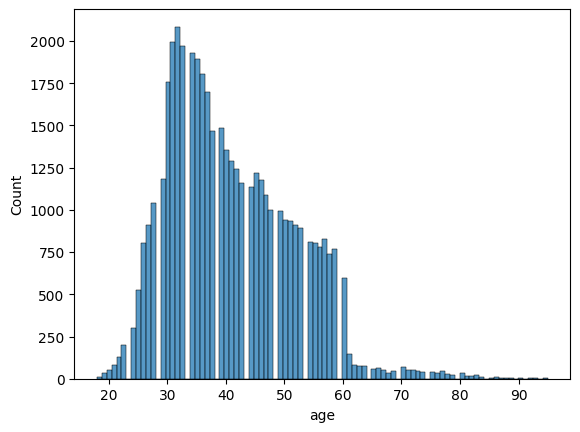

In [6]:
sns.histplot(x = 'age', data = bank_full)

In [7]:
age_dist = bank_full[bank_full['age'] > 0]
age_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [8]:
age_dist['age_class'] = age_dist['age'].apply(lambda x: 'childen' if x <= 14 else 
                                              ('early worker' if x > 14 and x < 25 else 
                                               ('prime worker' if x > 24 and x < 55 else 
                                                ('mature worker' if x > 54 and x < 65 else 'elderly'))))

age_dist_class = age_dist['age_class'].value_counts(normalize = True)*100
age_dist_class

age_class
prime worker     85.589790
mature worker    10.829223
elderly           1.791599
early worker      1.789388
Name: proportion, dtype: float64

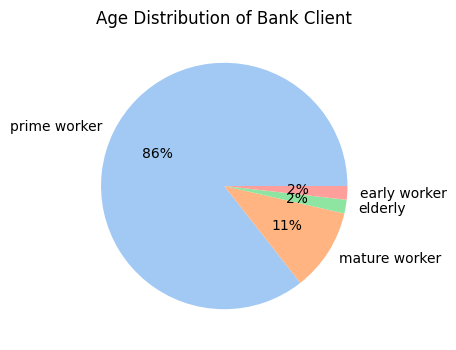

In [9]:
palette_color = sns.color_palette('pastel')

plt.figure(figsize=(4, 4))
plt.pie(age_dist_class,
        labels = age_dist_class.index,
        colors = palette_color,
        autopct = '%.0f%%',)
plt.title("Age Distribution of Bank Client")

plt.show()

In [10]:
#Central tendency of age from deposit holding client
age = age_dist['age'].median()
print(f'Age of deposit holding client: {age}')

Age of deposit holding client: 39.0


In [11]:
age_crosstab = pd.crosstab(age_dist['age_class'], age_dist['y'], dropna = False).sort_values(by='yes', ascending=False)
age_crosstab

y                 no   yes
age_class                 
prime worker   34596  4100
mature worker   4255   641
elderly          469   341
early worker     602   207

In [12]:
age_order = ['early worker', 'prime worker', 'mature worker', 'elderly']

In [13]:
age_crosstab_percentage = age_crosstab / age_crosstab.values.sum() * 100
age_crosstab_percentage = age_crosstab_percentage.reindex(age_order)
age_crosstab_percentage

y                     no       yes
age_class                         
early worker    1.331534  0.457853
prime worker   76.521201  9.068590
mature worker   9.411426  1.417797
elderly         1.037358  0.754241

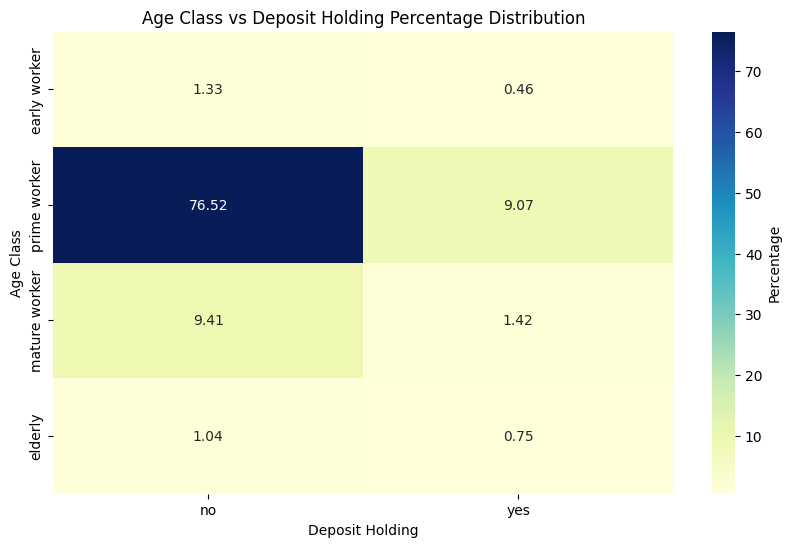

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(age_crosstab_percentage, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title("Age Class vs Deposit Holding Percentage Distribution")
plt.xlabel("Deposit Holding")
plt.ylabel("Age Class")
plt.show()

In [15]:
age_crosstab_percentage = age_crosstab.div(age_crosstab.sum(axis=1), axis=0) * 100
age_crosstab_percentage = age_crosstab_percentage.reindex(age_order)
age_crosstab_percentage

y                     no        yes
age_class                          
early worker   74.412855  25.587145
prime worker   89.404590  10.595410
mature worker  86.907680  13.092320
elderly        57.901235  42.098765

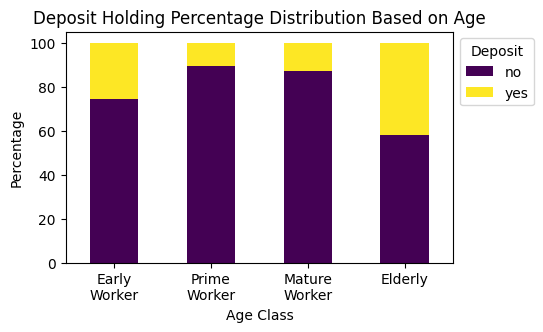

In [ ]:
age_crosstab_percentage.plot(kind='bar', stacked = True, figsize=(5, 3), colormap="viridis")
plt.title("Deposit Holding Percentage Distribution Based on Age")
plt.xlabel("Age Class")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center") 
ax = plt.gca()
ax.set_xticklabels(["Early\nWorker", "Prime\nWorker", "Mature\nWorker", "Elderly"])

plt.show()

In [17]:
age_crosstab_percentage = age_crosstab.div(age_crosstab.sum(axis=0), axis=1) * 100
age_crosstab_percentage = age_crosstab_percentage.reindex(age_order)
age_crosstab_percentage

y                     no        yes
age_class                          
early worker    1.507940   3.913783
prime worker   86.658985  77.519380
mature worker  10.658284  12.119493
elderly         1.174791   6.447344

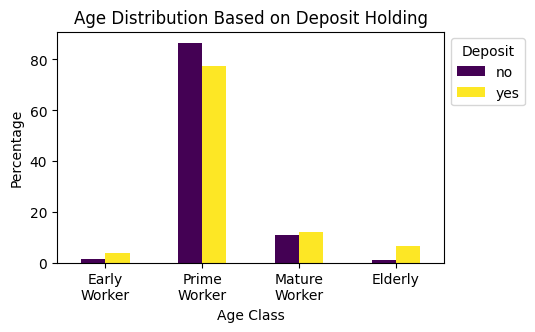

In [ ]:
age_crosstab_percentage.plot(kind='bar', figsize=(5, 3), colormap="viridis")
plt.title("Age Distribution Based on Deposit Holding")
plt.xlabel("Age Class")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center") 
ax = plt.gca()
ax.set_xticklabels(["Early\nWorker", "Prime\nWorker", "Mature\nWorker", "Elderly"])
plt.show()

In [19]:
chi_square_tes(data = age_crosstab)

Chi-square statistic for y with age_class: 930.5299313295337
P-value: 2.1123408182869367e-201
Degrees of Freedom: 3
Is the relationship significant? Yes


### 2. Job

<Axes: xlabel='job', ylabel='Count'>

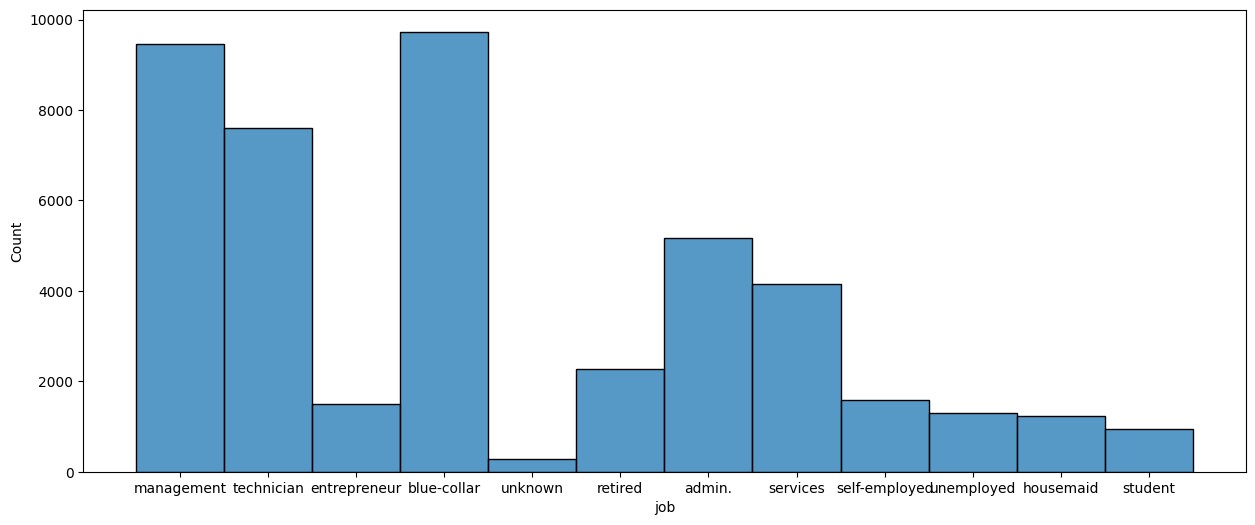

In [20]:
plt.figure(figsize=(15, 6))
sns.histplot(x = 'job', data = bank_full)

In [21]:
job_dist = bank_full.copy()
job_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [22]:
job_category_mapping = {
    "admin.": "white-collar",
    "unknown": "unknown",
    "unemployed": "unemployed",
    "management": "white-collar",
    "housemaid": "blue-collar",
    "entrepreneur": "white-collar",
    "student": "unemployed",
    "blue-collar": "blue-collar",
    "self-employed": "white-collar",
    "retired": "retired",
    "technician": "white-collar",
    "services": "blue-collar"
}

job_dist['job'] = job_dist['job'].map(job_category_mapping)

In [23]:
job_dist_percentage = job_dist['job'].value_counts(normalize = True)*100
job_dist_percentage

job
white-collar    55.942138
blue-collar     33.456460
retired          5.007631
unemployed       4.956758
unknown          0.637013
Name: proportion, dtype: float64

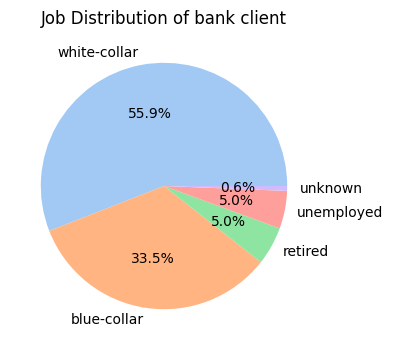

In [24]:
palette_color = sns.color_palette('pastel')

plt.figure(figsize=(4, 4))
plt.pie(job_dist_percentage,
        labels = job_dist_percentage.index,
        colors = palette_color,
        autopct = '%.1f%%')
plt.title("Job Distribution of bank client")

plt.show()

In [25]:
job_crosstab = pd.crosstab(job_dist['job'], job_dist['y'], dropna = False).sort_values(by = 'yes', ascending = False)
job_crosstab

y                no   yes
job                      
white-collar  22210  3082
blue-collar   13940  1186
retired        1748   516
unemployed     1770   471
unknown         254    34

In [26]:
job_crosstab_percentage = (job_crosstab / job_crosstab.values.sum() * 100)
job_crosstab_percentage

y                    no       yes
job                              
white-collar  49.125213  6.816925
blue-collar   30.833204  2.623255
retired        3.866316  1.141315
unemployed     3.914976  1.041782
unknown        0.561810  0.075203

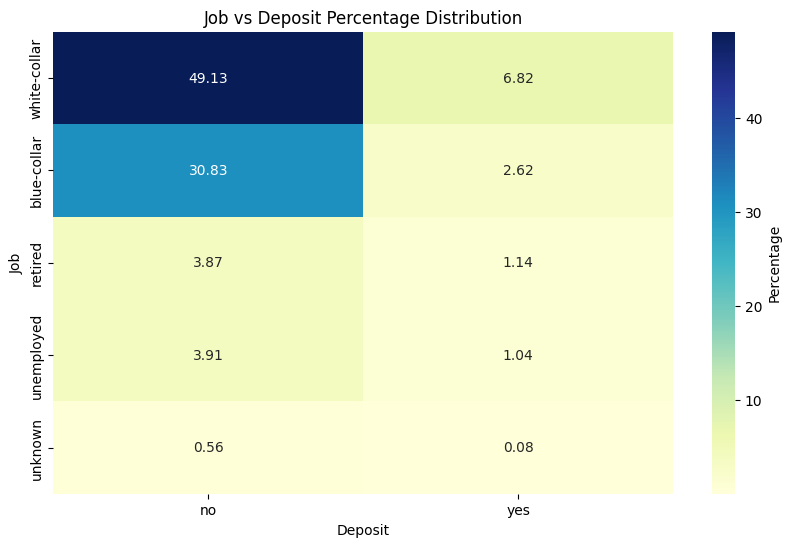

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(job_crosstab_percentage, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title("Job vs Deposit Percentage Distribution")
plt.xlabel("Deposit")
plt.ylabel("Job")
plt.xticks(rotation = 0)
plt.show()

In [28]:
job_crosstab_percentage = job_crosstab.div(job_crosstab.sum(axis=1), axis=0) * 100
job_crosstab_percentage

y                    no        yes
job                               
white-collar  87.814329  12.185671
blue-collar   92.159196   7.840804
retired       77.208481  22.791519
unemployed    78.982597  21.017403
unknown       88.194444  11.805556

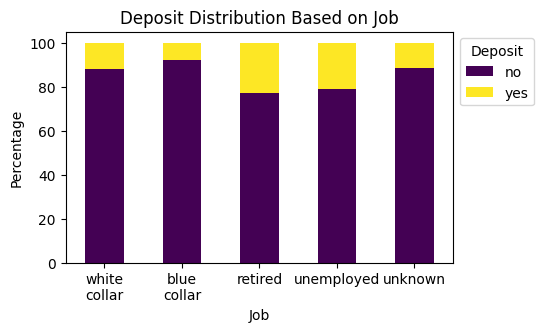

In [ ]:
job_crosstab_percentage.plot(kind='bar', stacked=True, figsize=(5, 3), colormap="viridis")
plt.title("Deposit Distribution Based on Job")
plt.xlabel("Job")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center") 
ax = plt.gca()
ax.set_xticklabels(["white\ncollar", "blue\ncollar", "retired", "unemployed", "unknown"])

plt.show()

In [30]:
job_crosstab_percentage = job_crosstab.div(job_crosstab.sum(axis=0), axis=1) * 100
job_crosstab_percentage

y                    no        yes
job                               
white-collar  55.633485  58.271885
blue-collar   34.918090  22.423899
retired        4.378538   9.756098
unemployed     4.433646   8.905275
unknown        0.636241   0.642844

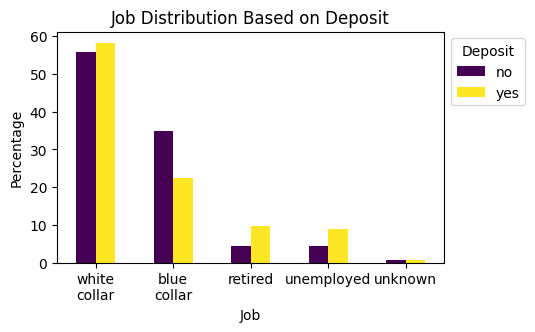

In [ ]:
job_crosstab_percentage.plot(kind='bar', figsize=(5, 3), colormap="viridis")
plt.title("Job Distribution Based on Deposit")
plt.xlabel("Job")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")  
ax = plt.gca()
ax.set_xticklabels(["white\ncollar", "blue\ncollar", "retired", "unemployed", "unknown"])

plt.show()

In [32]:
chi_square_tes(job_crosstab)

Chi-square statistic for y with job: 681.8221452391604
P-value: 3.006875919351701e-146
Degrees of Freedom: 4
Is the relationship significant? Yes


### 3. Marital Status

<Axes: xlabel='marital', ylabel='Count'>

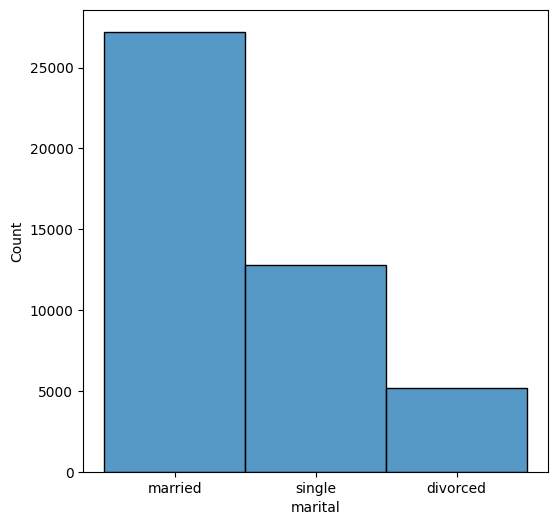

In [33]:
plt.figure(figsize=(6, 6))
sns.histplot(x = 'marital', data = bank_full)

In [34]:
marital_dist = bank_full.copy()
marital_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [35]:
marital_dist_percentage = marital_dist['marital'].value_counts(normalize = True)*100
marital_dist_percentage

marital
married     60.193316
single      28.289576
divorced    11.517109
Name: proportion, dtype: float64

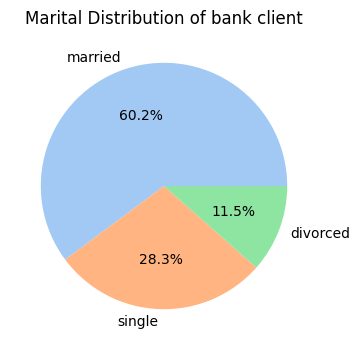

In [36]:
palette_color = sns.color_palette('pastel')

plt.figure(figsize=(4, 4))
plt.pie(marital_dist_percentage,
        labels = marital_dist_percentage.index,
        colors = palette_color,
        autopct = '%.1f%%')
plt.title("Marital Distribution of bank client")

plt.show()

In [37]:
marital_crosstab = pd.crosstab(marital_dist['marital'], marital_dist['y'], dropna = False).sort_values(by = 'yes', ascending = False)
marital_crosstab

y            no   yes
marital              
married   24459  2755
single    10878  1912
divorced   4585   622

In [38]:
marital_crosstab_percentage = (marital_crosstab / marital_crosstab.values.sum() * 100)
marital_crosstab_percentage

y                no       yes
marital                      
married   54.099666  6.093650
single    24.060516  4.229059
divorced  10.141337  1.375771

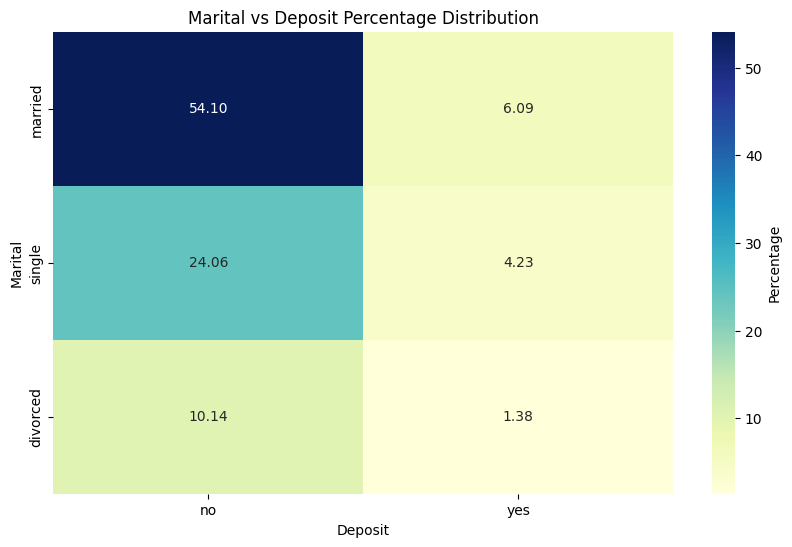

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(marital_crosstab_percentage, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title("Marital vs Deposit Percentage Distribution")
plt.xlabel("Deposit")
plt.ylabel("Marital")
plt.show()

In [40]:
marital_crosstab_percentage = marital_crosstab.div(marital_crosstab.sum(axis=1), axis=0) * 100
marital_crosstab_percentage

y                no        yes
marital                       
married   89.876534  10.123466
single    85.050821  14.949179
divorced  88.054542  11.945458

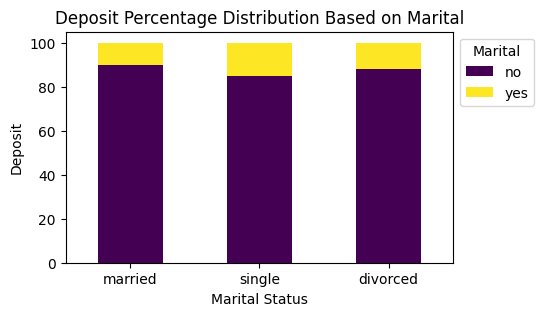

In [ ]:
marital_crosstab_percentage.plot(kind='bar', stacked=True, figsize=(5, 3), colormap="viridis")
plt.title("Deposit Percentage Distribution Based on Marital")
plt.xlabel("Marital Status")
plt.ylabel("Deposit")
plt.legend(title="Marital", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center") 

plt.show()

In [42]:
marital_crosstab_percentage = marital_crosstab.div(marital_crosstab.sum(axis=0), axis=1) * 100
marital_crosstab_percentage

y                no        yes
marital                       
married   61.266971  52.089242
single    27.248134  36.150501
divorced  11.484896  11.760257

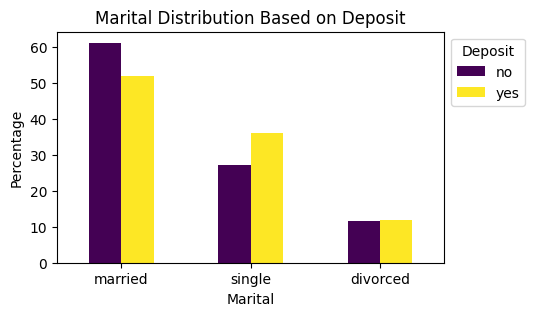

In [ ]:
marital_crosstab_percentage.plot(kind='bar', figsize=(5, 3), colormap="viridis")
plt.title("Marital Distribution Based on Deposit")
plt.xlabel("Marital")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")  
plt.show()

In [44]:
chi_square_tes(marital_crosstab)

Chi-square statistic for y with marital: 196.4959456560396
P-value: 2.1450999986791486e-43
Degrees of Freedom: 2
Is the relationship significant? Yes


### 4. Education

<Axes: xlabel='education', ylabel='Count'>

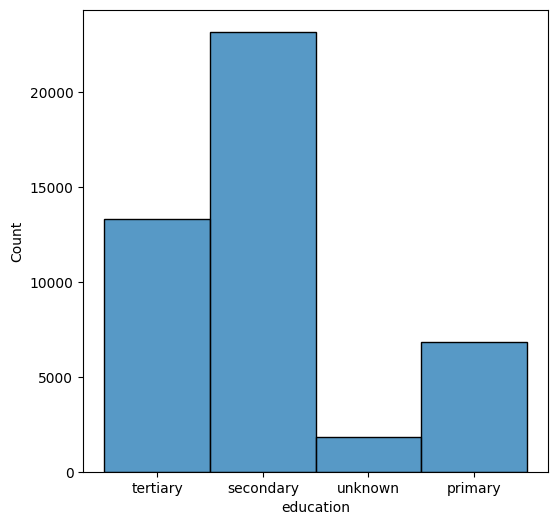

In [45]:
plt.figure(figsize=(6, 6))
sns.histplot(x = 'education', data = bank_full)

In [46]:
education_dist = bank_full.copy()
education_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [47]:
education_dist_percentage = education_dist['education'].value_counts(normalize = True)*100
education_dist_percentage

education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: proportion, dtype: float64

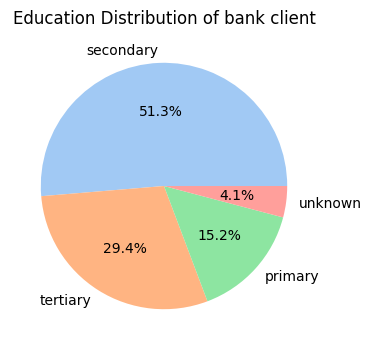

In [48]:
palette_color = sns.color_palette('pastel')

plt.figure(figsize=(4, 4))
plt.pie(education_dist_percentage,
        labels = education_dist_percentage.index,
        colors = palette_color,
        autopct = '%.1f%%')
plt.title("Education Distribution of bank client")

plt.show()

In [49]:
edu_order = ['primary', 'secondary', 'tertiary', 'unknown']

In [50]:
education_crosstab = pd.crosstab(education_dist['education'], education_dist['y'], dropna = False).sort_values(by = 'yes', ascending = False)
education_crosstab

y             no   yes
education             
secondary  20752  2450
tertiary   11305  1996
primary     6260   591
unknown     1605   252

In [51]:
education_crosstab_percentage = (education_crosstab / education_crosstab.values.sum() * 100)
education_crosstab_percentage = education_crosstab_percentage.reindex(edu_order)
education_crosstab_percentage

y                 no       yes
education                     
primary    13.846188  1.307204
secondary  45.900334  5.419035
tertiary   25.004977  4.414855
unknown     3.550021  0.557386

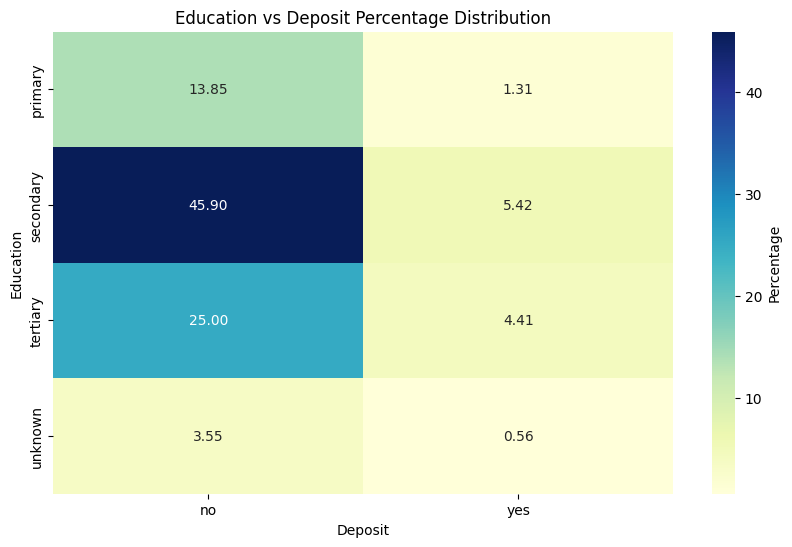

In [52]:
plt.figure(figsize=(10, 6))
sns.heatmap(education_crosstab_percentage, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title("Education vs Deposit Percentage Distribution")
plt.xlabel("Deposit")
plt.ylabel("Education")
plt.show()

In [53]:
education_crosstab_percentage = education_crosstab.div(education_crosstab.sum(axis=1), axis=0) * 100
education_crosstab_percentage = education_crosstab_percentage.reindex(edu_order)
education_crosstab_percentage

y                 no        yes
education                      
primary    91.373522   8.626478
secondary  89.440565  10.559435
tertiary   84.993610  15.006390
unknown    86.429725  13.570275

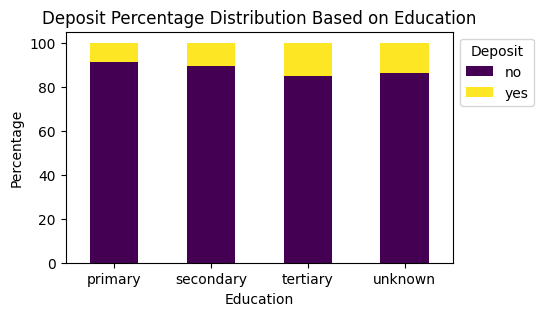

In [ ]:
education_crosstab_percentage.plot(kind='bar', stacked=True, figsize=(5, 3), colormap="viridis")
plt.title("Deposit Percentage Distribution Based on Education")
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")  

plt.show()

In [55]:
education_crosstab_percentage = education_crosstab.div(education_crosstab.sum(axis=0), axis=1) * 100
education_crosstab_percentage = education_crosstab_percentage.reindex(edu_order)
education_crosstab_percentage

y                 no        yes
education                      
primary    15.680577  11.174135
secondary  51.981364  46.322556
tertiary   28.317720  37.738703
unknown     4.020340   4.764606

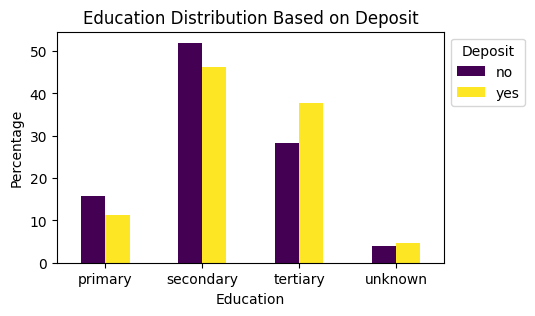

In [ ]:
education_crosstab_percentage.plot(kind='bar', figsize=(5, 3), colormap="viridis")
plt.title("Education Distribution Based on Deposit")
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")  

plt.show()

In [57]:
chi_square_tes(education_crosstab)

Chi-square statistic for y with education: 238.92350616407606
P-value: 1.6266562124072994e-51
Degrees of Freedom: 3
Is the relationship significant? Yes


## Economic Information

### 1. Default

<Axes: xlabel='default', ylabel='Count'>

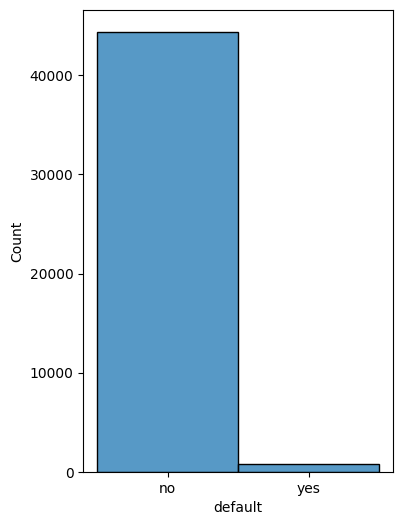

In [58]:
plt.figure(figsize=(4, 6))
sns.histplot(x = 'default', data = bank_full)

In [59]:
default_dist = bank_full.copy()
default_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [60]:
default_dist_percentage = default_dist['default'].value_counts(normalize = True)*100
default_dist_percentage

default
no     98.197341
yes     1.802659
Name: proportion, dtype: float64

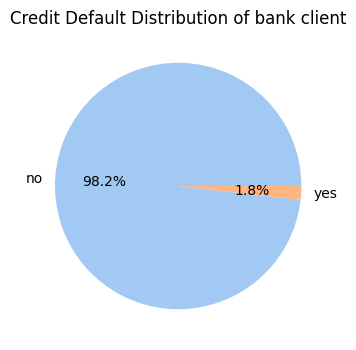

In [61]:
palette_color = sns.color_palette('pastel')

plt.figure(figsize=(4, 4))
plt.pie(default_dist_percentage,
        labels = default_dist_percentage.index,
        colors = palette_color,
        autopct = '%.1f%%')
plt.title("Credit Default Distribution of bank client")

plt.show()

In [62]:
default_crosstab = pd.crosstab(default_dist['default'], default_dist['y'], dropna = False).sort_values(by = 'yes', ascending = False)
default_crosstab

y           no   yes
default             
no       39159  5237
yes        763    52

In [63]:
default_crosstab_percentage = (default_crosstab / default_crosstab.values.sum() * 100)
default_crosstab_percentage

y               no        yes
default                      
no       86.613877  11.583464
yes       1.687642   0.115016

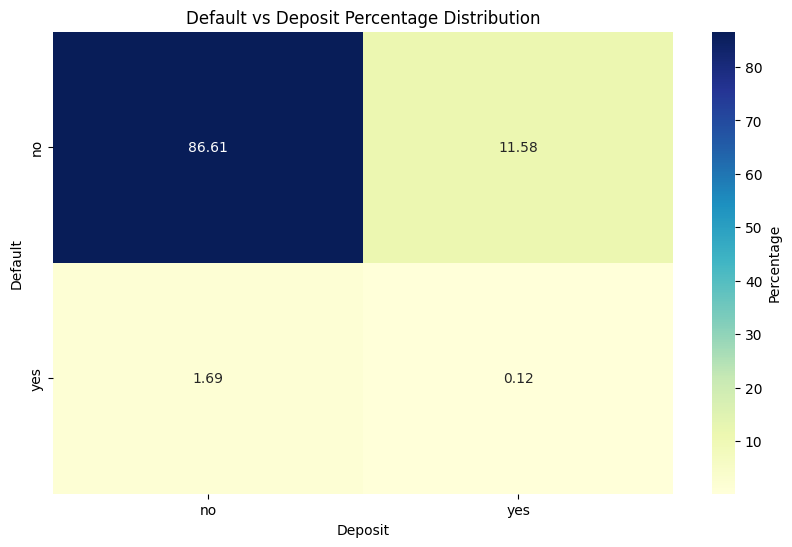

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(default_crosstab_percentage, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title("Default vs Deposit Percentage Distribution")
plt.xlabel("Deposit")
plt.ylabel("Default")
plt.show()

In [65]:
default_crosstab_percentage = default_crosstab.div(default_crosstab.sum(axis=1), axis=0) * 100
default_crosstab_percentage

y               no        yes
default                      
no       88.203892  11.796108
yes      93.619632   6.380368

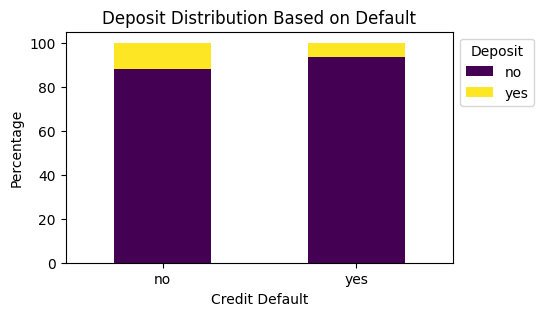

In [ ]:
default_crosstab_percentage.plot(kind='bar', stacked=True, figsize=(5, 3), colormap="viridis")
plt.title("Deposit Distribution Based on Default")
plt.xlabel("Credit Default")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center") 

plt.show()

In [67]:
default_crosstab_percentage = default_crosstab.div(default_crosstab.sum(axis=0), axis=1) * 100
default_crosstab_percentage

y               no        yes
default                      
no       98.088773  99.016827
yes       1.911227   0.983173

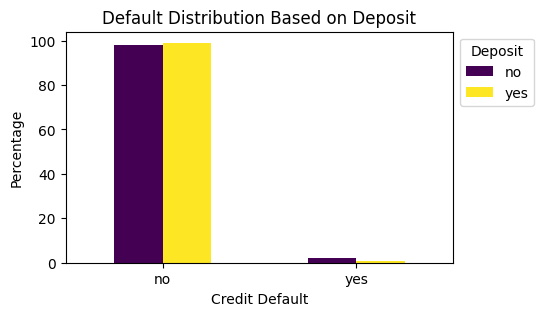

In [ ]:
default_crosstab_percentage.plot(kind='bar', figsize=(5, 3), colormap="viridis")
plt.title("Default Distribution Based on Deposit")
plt.xlabel("Credit Default")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center") 

plt.show()

In [69]:
chi_square_tes(default_crosstab)

Chi-square statistic for y with default: 22.20224995571685
P-value: 2.4538606753508344e-06
Degrees of Freedom: 1
Is the relationship significant? Yes


### 2. Balance

<Axes: xlabel='balance', ylabel='Count'>

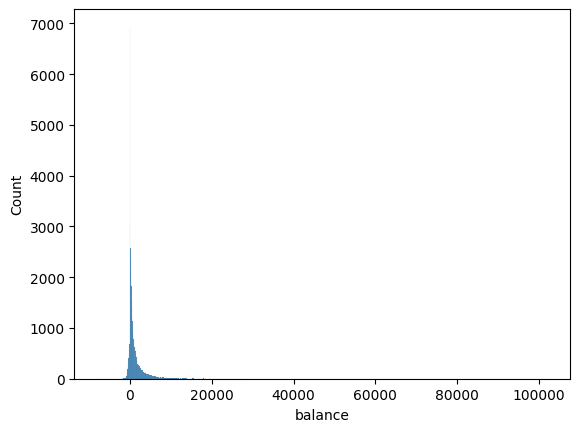

In [70]:
sns.histplot(x = 'balance', data = bank_full)

In [71]:
bank_full['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [72]:
def classify_balance(balance):
    if balance < 0:
        return 'overdrawn'
    elif balance < 72:
        return 'low'
    elif balance < 1428:
        return 'moderate'
    elif balance < 10000:
        return 'high'
    else:
        return 'very high'

In [73]:
balance_order = ['overdrawn', 'low', 'moderate', 'high', 'very high']

In [74]:
balance_dist = bank_full.copy()
balance_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [75]:
balance_dist['balance_class'] = balance_dist['balance'].apply(classify_balance)
balance_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

         y balance_class  
0       no          high  
1       no           low  
2       no           low  
3       no          high  
4       no           low  
...    ...           ...  
45206  yes      moderate  
45207  yes          high  
45208  yes          high  
45209   no      moderate  
45210   no          high  

[45211 rows x 18 columns]

In [76]:
balance_dist_percentage = balance_dist['balance_class'].value_counts(normalize = True)*100
balance_dist_percentage

balance_class
moderate     50.051979
high         23.169140
low          16.615425
overdrawn     8.329831
very high     1.833625
Name: proportion, dtype: float64

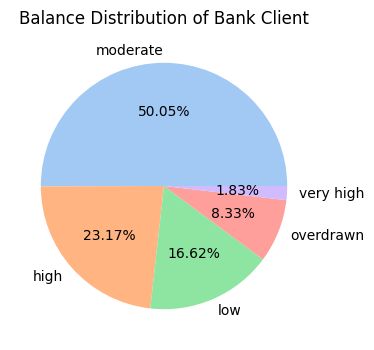

In [77]:
palette_color = sns.color_palette('pastel')

plt.figure(figsize=(4, 4))
plt.pie(balance_dist_percentage,
        labels = balance_dist_percentage.index,
        colors = palette_color,
        autopct = '%.2f%%')
plt.title("Balance Distribution of Bank Client")

plt.show()

In [78]:
balance_crosstab = pd.crosstab(balance_dist['balance_class'], education_dist['y'], dropna = False).sort_values(by = 'yes', ascending = False)
balance_crosstab

y                 no   yes
balance_class             
moderate       19981  2648
high            8785  1690
low             6906   606
overdrawn       3556   210
very high        694   135

In [79]:
balance_crosstab_percentage = (balance_crosstab / balance_crosstab.values.sum() * 100)
balance_crosstab_percentage = balance_crosstab_percentage.reindex(balance_order)
balance_crosstab_percentage

y                     no       yes
balance_class                     
overdrawn       7.865343  0.464489
low            15.275044  1.340382
moderate       44.194997  5.856982
high           19.431112  3.738028
very high       1.535025  0.298600

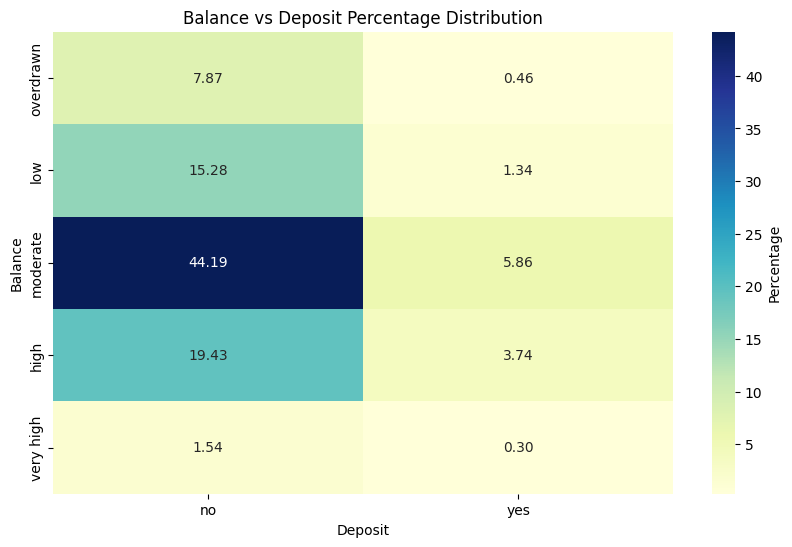

In [80]:
plt.figure(figsize=(10, 6))
sns.heatmap(balance_crosstab_percentage, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title("Balance vs Deposit Percentage Distribution")
plt.xlabel("Deposit")
plt.ylabel("Balance")
plt.show()

In [81]:
balance_crosstab_percentage = balance_crosstab.div(balance_crosstab.sum(axis=1), axis=0) * 100
balance_crosstab_percentage = balance_crosstab_percentage.reindex(balance_order)
balance_crosstab_percentage

y                     no        yes
balance_class                      
overdrawn      94.423792   5.576208
low            91.932907   8.067093
moderate       88.298201  11.701799
high           83.866348  16.133652
very high      83.715320  16.284680

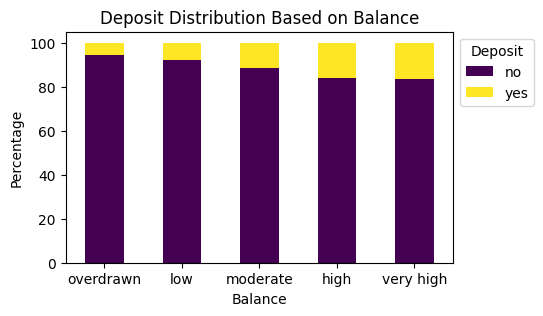

In [ ]:
balance_crosstab_percentage.plot(kind='bar', stacked=True, figsize=(5, 3), colormap="viridis")
plt.title("Deposit Distribution Based on Balance")
plt.xlabel("Balance")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")  

plt.show()

In [83]:
balance_crosstab_percentage = balance_crosstab.div(balance_crosstab.sum(axis=0), axis=1) * 100
balance_crosstab_percentage = balance_crosstab_percentage.reindex(balance_order)
balance_crosstab_percentage

y                     no        yes
balance_class                      
overdrawn       8.907369   3.970505
low            17.298733  11.457742
moderate       50.050098  50.066175
high           22.005411  31.953110
very high       1.738390   2.552467

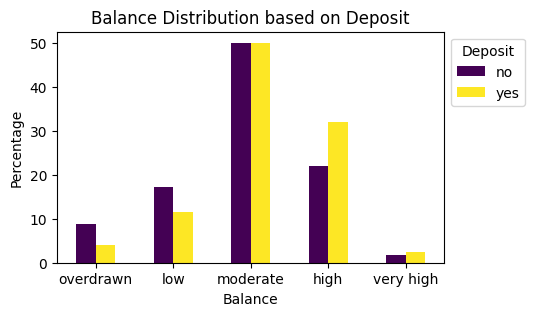

In [ ]:
balance_crosstab_percentage.plot(kind='bar', figsize=(5, 3), colormap="viridis")
plt.title("Balance Distribution based on Deposit")
plt.xlabel("Balance")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center") 

plt.show()

In [85]:
chi_square_tes(balance_crosstab)

Chi-square statistic for y with balance_class: 448.8957449758658
P-value: 7.52616343195848e-96
Degrees of Freedom: 4
Is the relationship significant? Yes


### 3. Housing or Loan

In [86]:
def classify_all_loan(housing, loan):
    if housing == 'yes' or loan == 'yes':
        return 'yes'
    else:
        return 'no'

In [87]:
allloan_dist = bank_full.copy()
allloan_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [88]:
allloan_dist['all_loan'] = allloan_dist.apply(lambda row: classify_all_loan(row['housing'], row['loan']), axis=1)
allloan_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

         y all_loan  
0       no      yes  
1       no      yes  
2       no      yes  
3       no      yes  
4       no       no  
...    ...      ...  
45206  yes       no  
45207  yes       no  
45208  yes       no  
45209   no       no  
45210   no       no  

[45211 rows x 18 columns]

In [89]:
allloan_dist_percentage = allloan_dist['all_loan'].value_counts(normalize = True)*100
allloan_dist_percentage

all_loan
yes    61.947314
no     38.052686
Name: proportion, dtype: float64

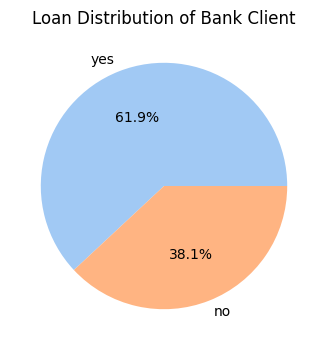

In [90]:
palette_color = sns.color_palette('pastel')

plt.figure(figsize=(4, 4))
plt.pie(allloan_dist_percentage,
        labels = allloan_dist_percentage.index,
        colors = palette_color,
        autopct = '%.1f%%')
plt.title("Loan Distribution of Bank Client")

plt.show()

In [91]:
allloan_crosstab = pd.crosstab(allloan_dist['all_loan'], allloan_dist['y'], dropna = False).sort_values(by = 'yes', ascending = False)
allloan_crosstab

y            no   yes
all_loan             
no        14069  3135
yes       25853  2154

In [92]:
allloan_crosstab_percentage = (allloan_crosstab / allloan_crosstab.values.sum() * 100)
allloan_crosstab_percentage

y                no       yes
all_loan                     
no        31.118533  6.934153
yes       57.182986  4.764327

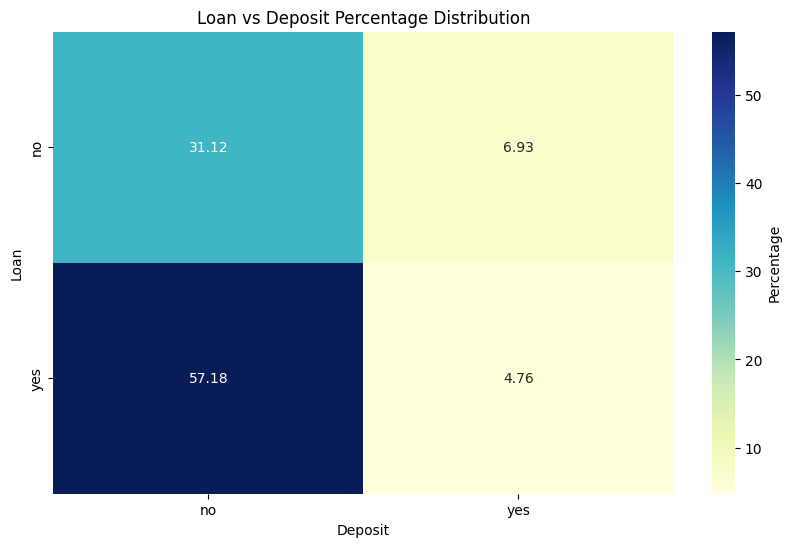

In [93]:
plt.figure(figsize=(10, 6))
sns.heatmap(allloan_crosstab_percentage, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title("Loan vs Deposit Percentage Distribution")
plt.xlabel("Deposit")
plt.ylabel("Loan")
plt.show()

In [94]:
allloan_crosstab_percentage = allloan_crosstab.div(allloan_crosstab.sum(axis=1), axis=0) * 100
allloan_crosstab_percentage

y                no        yes
all_loan                      
no        81.777494  18.222506
yes       92.309066   7.690934

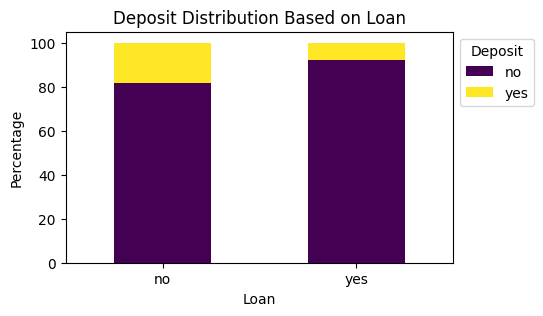

In [ ]:
allloan_crosstab_percentage.plot(kind='bar', stacked=True, figsize=(5, 3), colormap="viridis")
plt.title("Deposit Distribution Based on Loan")
plt.xlabel("Loan")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")  

plt.show()

In [96]:
allloan_crosstab_percentage = allloan_crosstab.div(allloan_crosstab.sum(axis=0), axis=1) * 100
allloan_crosstab_percentage

y               no        yes
all_loan                     
no        35.24122  59.273965
yes       64.75878  40.726035

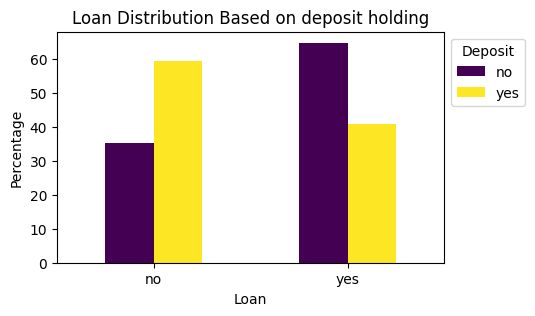

In [ ]:
allloan_crosstab_percentage.plot(kind='bar', figsize=(5, 3), colormap="viridis")
plt.title("Loan Distribution Based on deposit holding")
plt.xlabel("Loan")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")  

plt.show()

In [98]:
chi_square_tes(allloan_crosstab)

Chi-square statistic for y with all_loan: 1143.2827737810885
P-value: 1.2935530322600446e-250
Degrees of Freedom: 1
Is the relationship significant? Yes


## Past Campaign Interactions

### 1. Campaign

<Axes: xlabel='campaign', ylabel='Count'>

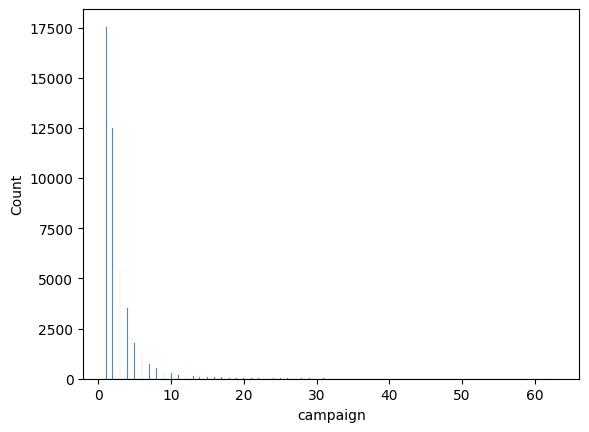

In [99]:
sns.histplot(x = 'campaign', data = bank_full)

In [100]:
bank_full['campaign'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [101]:
def classify_campaign(contacts):
    if contacts == 1:
        return 'low'
    elif contacts <= 3:
        return 'moderate'
    elif contacts <= 10:
        return 'high'
    else:
        return 'very high'

In [102]:
campaign_order = ['low', 'moderate', 'high', 'very high']

In [103]:
campaign_dist = bank_full.copy()
campaign_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [104]:
campaign_dist['campaign_class'] = campaign_dist['campaign'].apply(classify_campaign)
campaign_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

         y campaign_class  
0       no            low  
1       no            low  
2       no            low  
3       no            low  
4       no            low  
...    ...            ...  
45206  yes       moderate  
45207  yes       moderate  
45208  yes           high  
45209   no           high  
45210   no       moderate  

[45211 rows x 18 columns]

In [105]:
campaign_dist_percentage = campaign_dist['campaign_class'].value_counts(normalize = True)*100
campaign_dist_percentage

campaign_class
moderate     39.870828
low          38.804716
high         18.679083
very high     2.645374
Name: proportion, dtype: float64

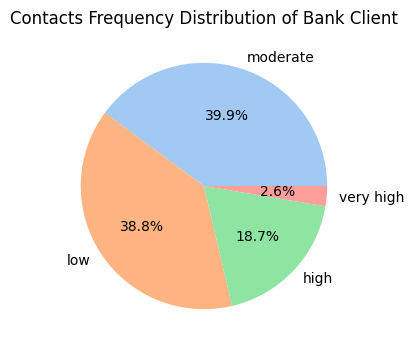

In [106]:
palette_color = sns.color_palette('pastel')

plt.figure(figsize=(4, 4))
plt.pie(campaign_dist_percentage,
        labels = campaign_dist_percentage.index,
        colors = palette_color,
        autopct = '%.1f%%')
plt.title("Contacts Frequency Distribution of Bank Client")

plt.show()

In [107]:
campaign_crosstab = pd.crosstab(campaign_dist['campaign_class'], campaign_dist['y'], dropna = False).sort_values(by = 'yes', ascending = False)
campaign_crosstab

y                  no   yes
campaign_class             
low             14983  2561
moderate        16007  2019
high             7783   662
very high        1149    47

In [108]:
campaign_crosstab_percentage = (campaign_crosstab / campaign_crosstab.values.sum() * 100)
campaign_crosstab_percentage = campaign_crosstab_percentage.reindex(campaign_order)
campaign_crosstab_percentage

y                      no       yes
campaign_class                     
low             33.140165  5.664551
moderate        35.405101  4.465727
high            17.214837  1.464245
very high        2.541417  0.103957

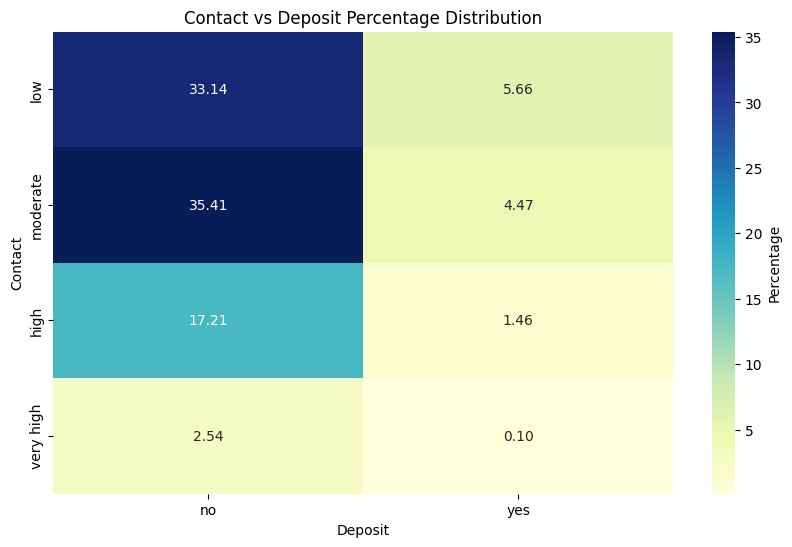

In [109]:
plt.figure(figsize=(10, 6))
sns.heatmap(campaign_crosstab_percentage, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title("Contact vs Deposit Percentage Distribution")
plt.xlabel("Deposit")
plt.ylabel("Contact")
plt.show()

In [110]:
campaign_crosstab_percentage = campaign_crosstab.div(campaign_crosstab.sum(axis=1), axis=0) * 100
campaign_crosstab_percentage = campaign_crosstab_percentage.reindex(campaign_order)
campaign_crosstab_percentage

y                      no        yes
campaign_class                      
low             85.402417  14.597583
moderate        88.799512  11.200488
high            92.161042   7.838958
very high       96.070234   3.929766

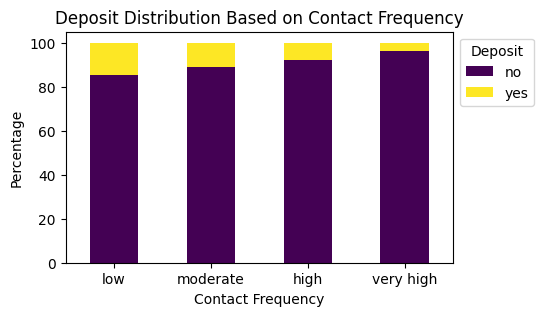

In [ ]:
campaign_crosstab_percentage.plot(kind='bar', stacked=True, figsize=(5, 3), colormap="viridis")
plt.title("Deposit Distribution Based on Contact Frequency")
plt.xlabel("Contact Frequency")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")  

plt.show()

In [112]:
campaign_crosstab_percentage = campaign_crosstab.div(campaign_crosstab.sum(axis=0), axis=1) * 100
campaign_crosstab_percentage

y                      no        yes
campaign_class                      
low             37.530685  48.421252
moderate        40.095687  38.173568
high            19.495516  12.516544
very high        2.878112   0.888637

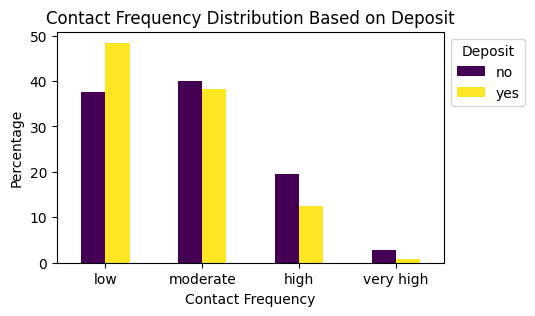

In [ ]:
campaign_crosstab_percentage.plot(kind='bar', figsize=(5, 3), colormap="viridis")
plt.title("Contact Frequency Distribution Based on Deposit")
plt.xlabel("Contact Frequency")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")  

plt.show()

In [114]:
chi_square_tes(campaign_crosstab)

Chi-square statistic for y with campaign_class: 338.7264247723358
P-value: 4.117489811901975e-73
Degrees of Freedom: 3
Is the relationship significant? Yes


### 2. Poutcome

<Axes: xlabel='poutcome', ylabel='Count'>

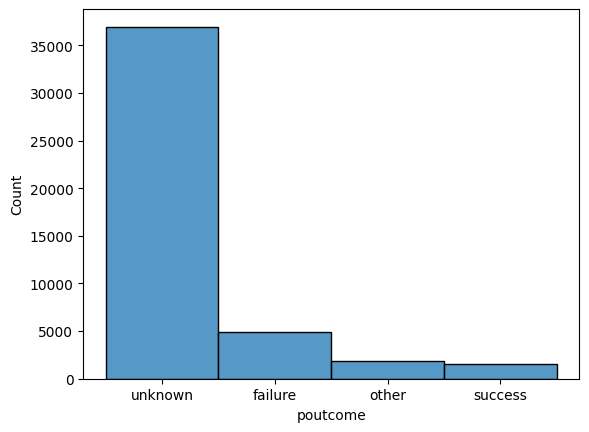

In [115]:
sns.histplot(x = 'poutcome', data = bank_full)

In [116]:
poutcome_dist = bank_full.copy()
poutcome_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [117]:
poutcome_order = ['success', 'failure', 'other', 'unknown']

In [118]:
poutcome_dist_percentage = poutcome_dist['poutcome'].value_counts(normalize = True)*100
poutcome_dist_percentage

poutcome
unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: proportion, dtype: float64

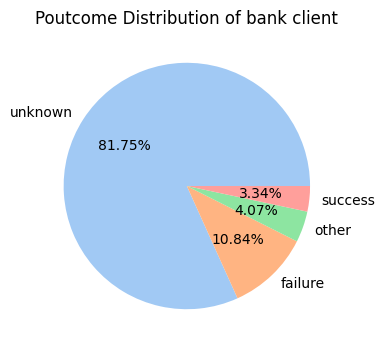

In [119]:
palette_color = sns.color_palette('pastel')

plt.figure(figsize=(4, 4))
plt.pie(poutcome_dist_percentage,
        labels = poutcome_dist_percentage.index,
        colors = palette_color,
        autopct = '%.2f%%')
plt.title("Poutcome Distribution of bank client")

plt.show()

In [120]:
poutcome_crosstab = pd.crosstab(poutcome_dist['poutcome'], poutcome_dist['y'], dropna = False).sort_values(by = 'yes', ascending = False)
poutcome_crosstab

y            no   yes
poutcome             
unknown   33573  3386
success     533   978
failure    4283   618
other      1533   307

In [121]:
poutcome_crosstab_percentage = (poutcome_crosstab / poutcome_crosstab.values.sum() * 100)
poutcome_crosstab_percentage = poutcome_crosstab_percentage.reindex(poutcome_order)
poutcome_crosstab_percentage

y                no       yes
poutcome                     
success    1.178917  2.163190
failure    9.473358  1.366924
other      3.390768  0.679038
unknown   74.258477  7.489328

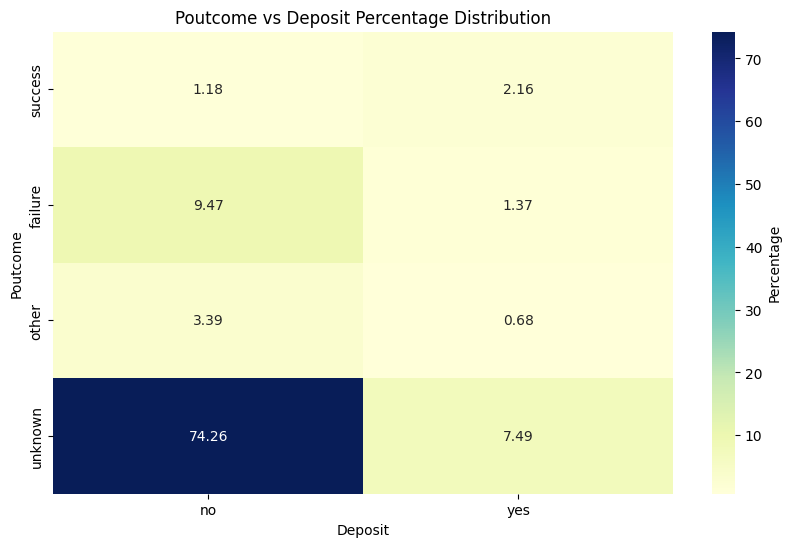

In [122]:
plt.figure(figsize=(10, 6))
sns.heatmap(poutcome_crosstab_percentage, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title("Poutcome vs Deposit Percentage Distribution")
plt.xlabel("Deposit")
plt.ylabel("Poutcome")
plt.show()

In [123]:
poutcome_crosstab_percentage = poutcome_crosstab.div(poutcome_crosstab.sum(axis=1), axis=0) * 100
poutcome_crosstab_percentage = poutcome_crosstab_percentage.reindex(poutcome_order)
poutcome_crosstab_percentage

y                no        yes
poutcome                      
success   35.274653  64.725347
failure   87.390329  12.609671
other     83.315217  16.684783
unknown   90.838497   9.161503

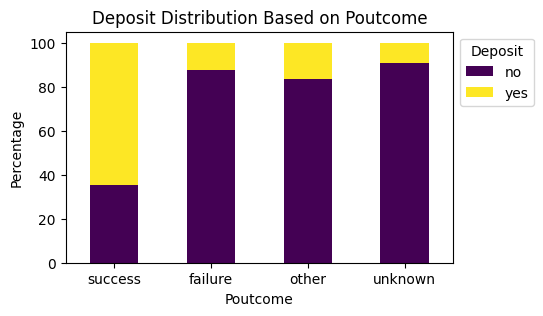

In [ ]:
poutcome_crosstab_percentage.plot(kind='bar', stacked=True, figsize=(5, 3), colormap="viridis")
plt.title("Deposit Distribution Based on Poutcome")
plt.xlabel("Poutcome")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")  

plt.show()

In [125]:
poutcome_crosstab_percentage = poutcome_crosstab.div(poutcome_crosstab.sum(axis=0), axis=1) * 100
poutcome_crosstab_percentage = poutcome_crosstab_percentage.reindex(poutcome_order)
poutcome_crosstab_percentage

y                no        yes
poutcome                      
success    1.335103  18.491208
failure   10.728420  11.684628
other      3.839988   5.804500
unknown   84.096488  64.019663

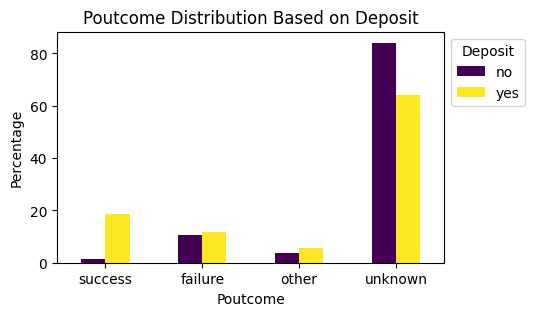

In [ ]:
poutcome_crosstab_percentage.plot(kind='bar', figsize=(5, 3), colormap="viridis")
plt.title("Poutcome Distribution Based on Deposit")
plt.xlabel("Poutcome")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")  

plt.show()

In [127]:
chi_square_tes(poutcome_crosstab)

Chi-square statistic for y with poutcome: 4391.5065887686615
P-value: 0.0
Degrees of Freedom: 3
Is the relationship significant? Yes


## Engagement Level

### 1. Duration

<Axes: xlabel='duration', ylabel='Count'>

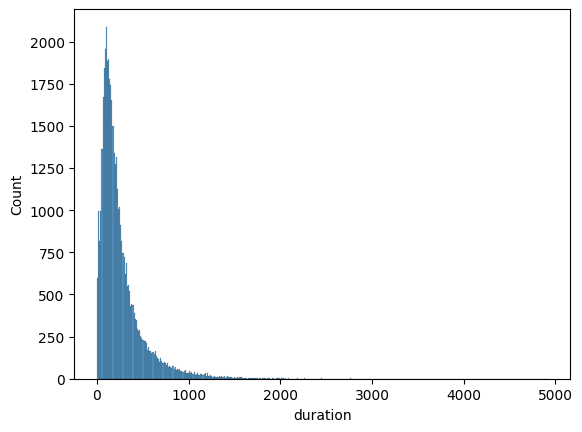

In [128]:
sns.histplot(x = 'duration', data = bank_full)

In [129]:
bank_full['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [130]:
def classify_contact_duration(duration):
    if duration <= 60:
        return 'very short'
    elif duration <= 180:
        return 'short'
    elif duration <= 319:
        return 'moderate'
    elif duration <= 600:
        return 'long'
    else:
        return 'very long'

In [131]:
duration_dist = bank_full.copy()
duration_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [132]:
duration_dist['duration_class'] = duration_dist['duration'].apply(classify_contact_duration)
duration_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

         y duration_class  
0       no       moderate  
1       no          short  
2       no          short  
3       no          short  
4       no       moderate  
...    ...            ...  
45206  yes      very long  
45207  yes           long  
45208  yes      very long  
45209   no           long  
45210   no           long  

[45211 rows x 18 columns]

<Axes: xlabel='duration_class', ylabel='Count'>

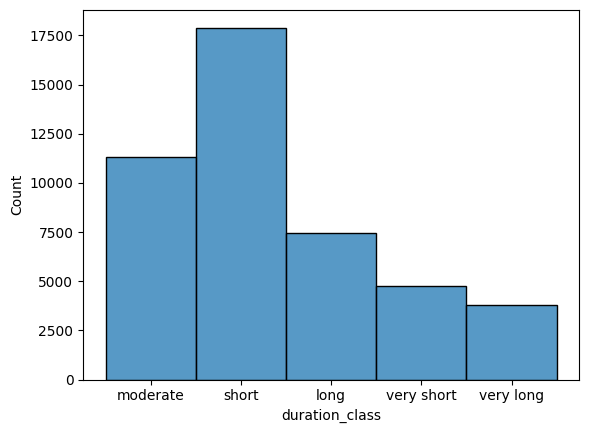

In [133]:
sns.histplot(x = 'duration_class', data = duration_dist)

In [134]:
duration_dist_percentage = duration_dist['duration_class'].value_counts(normalize = True)*100
duration_dist_percentage

duration_class
short         39.578864
moderate      24.971799
long          16.524740
very short    10.541682
very long      8.382916
Name: proportion, dtype: float64

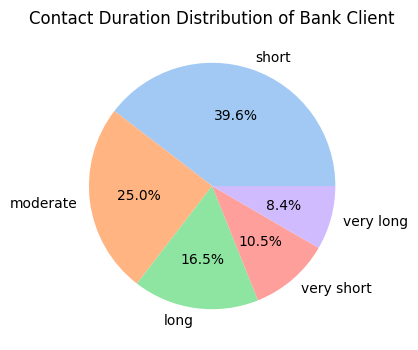

In [135]:
palette_color = sns.color_palette('pastel')

plt.figure(figsize=(4, 4))
plt.pie(duration_dist_percentage,
        labels = duration_dist_percentage.index,
        colors = palette_color,
        autopct = '%.1f%%')
plt.title("Contact Duration Distribution of Bank Client")

plt.show()

In [136]:
duration_crosstab = pd.crosstab(duration_dist['duration_class'], duration_dist['y'], dropna = False).sort_values(by = 'yes', ascending = False)
duration_crosstab

y                  no   yes
duration_class             
very long        1957  1833
long             5989  1482
moderate        10025  1265
short           17194   700
very short       4757     9

In [137]:
duration_crosstab_percentage = (duration_crosstab / duration_crosstab.values.sum() * 100)
duration_crosstab_percentage

y                      no       yes
duration_class                     
very long        4.328593  4.054323
long            13.246776  3.277963
moderate        22.173807  2.797992
short           38.030568  1.548296
very short      10.521776  0.019907

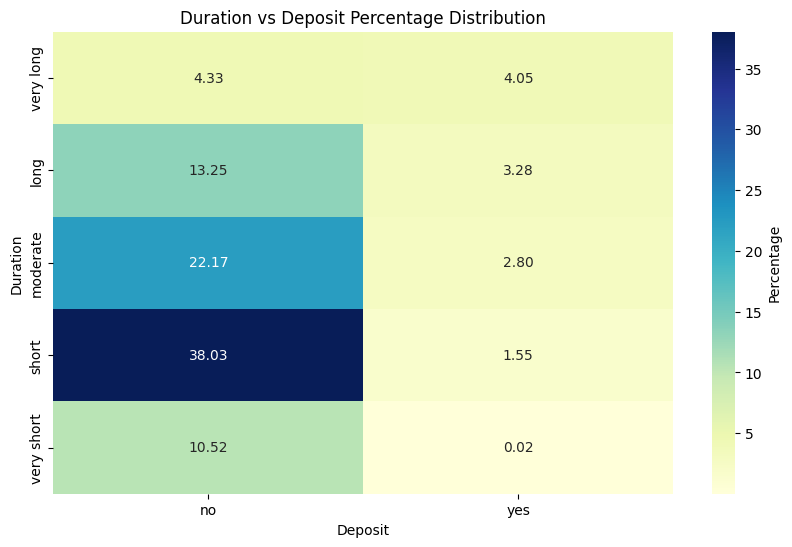

In [138]:
plt.figure(figsize=(10, 6))
sns.heatmap(duration_crosstab_percentage, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title("Duration vs Deposit Percentage Distribution")
plt.xlabel("Deposit")
plt.ylabel("Duration")
plt.show()

In [139]:
duration_crosstab_percentage = duration_crosstab.div(duration_crosstab.sum(axis=1), axis=0) * 100
duration_crosstab_percentage

y                      no        yes
duration_class                      
very long       51.635884  48.364116
long            80.163298  19.836702
moderate        88.795394  11.204606
short           96.088074   3.911926
very short      99.811162   0.188838

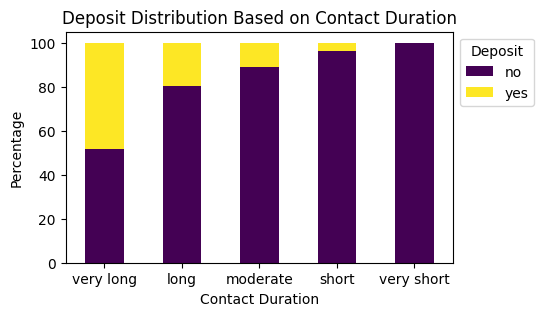

In [ ]:
duration_crosstab_percentage.plot(kind='bar', stacked=True, figsize=(5, 3), colormap="viridis")
plt.title("Deposit Distribution Based on Contact Duration")
plt.xlabel("Contact Duration")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")  

plt.show()

In [141]:
duration_crosstab_percentage = duration_crosstab_percentage.div(duration_crosstab_percentage.sum(axis=0), axis=1) * 100
duration_crosstab_percentage

y                      no        yes
duration_class                      
very long       12.397755  57.916806
long            19.247176  23.754769
moderate        21.319739  13.417695
short           23.070709   4.684594
very short      23.964621   0.226136

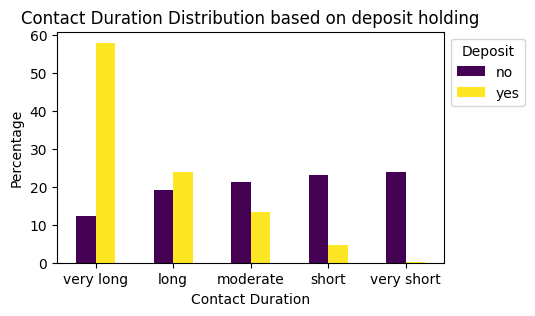

In [ ]:
duration_crosstab_percentage.plot(kind='bar', figsize=(5, 3), colormap="viridis")
plt.title("Contact Duration Distribution based on deposit holding")
plt.xlabel("Contact Duration")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center") 

plt.show()

In [143]:
chi_square_tes(duration_crosstab)

Chi-square statistic for y with duration_class: 7075.554758668831
P-value: 0.0
Degrees of Freedom: 4
Is the relationship significant? Yes


### 2. Contact Type

<Axes: xlabel='contact', ylabel='Count'>

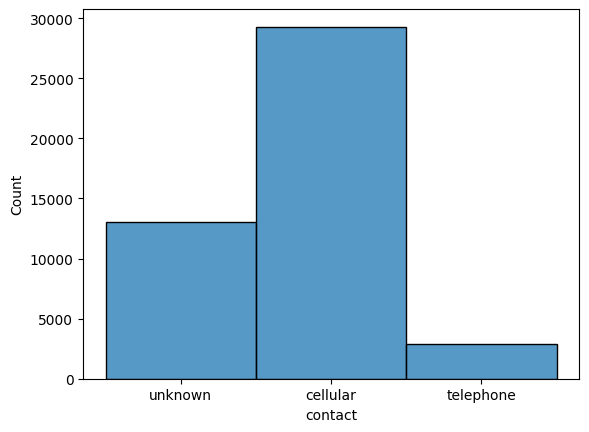

In [144]:
sns.histplot(x = 'contact', data = bank_full)

In [145]:
contact_dist = bank_full.copy()
contact_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [146]:
contact_order = ['cellular', 'telephone', 'unknown']

In [147]:
contact_dist_percentage = contact_dist['contact'].value_counts(normalize = True)*100
contact_dist_percentage

contact
cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: proportion, dtype: float64

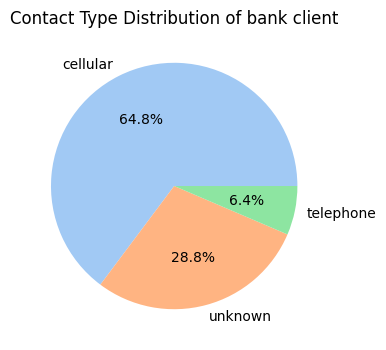

In [148]:
palette_color = sns.color_palette('pastel')

plt.figure(figsize=(4, 4))
plt.pie(contact_dist_percentage,
        labels = contact_dist_percentage.index,
        colors = palette_color,
        autopct = '%.1f%%')
plt.title("Contact Type Distribution of bank client")

plt.show()

In [149]:
contact_crosstab = pd.crosstab(contact_dist['contact'], contact_dist['y'], dropna = False).sort_values(by = 'yes', ascending = False)
contact_crosstab

y             no   yes
contact               
cellular   24916  4369
unknown    12490   530
telephone   2516   390

In [150]:
contact_crosstab_percentage = (contact_crosstab / contact_crosstab.values.sum() * 100)
contact_crosstab_percentage = contact_crosstab_percentage.reindex(contact_order)
contact_crosstab_percentage

y                 no       yes
contact                       
cellular   55.110482  9.663577
telephone   5.565017  0.862622
unknown    27.626020  1.172281

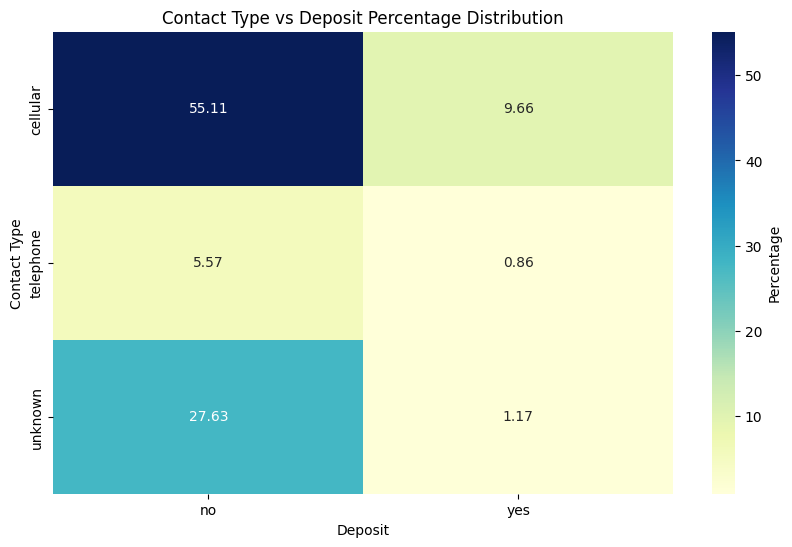

In [151]:
plt.figure(figsize=(10, 6))
sns.heatmap(contact_crosstab_percentage, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title("Contact Type vs Deposit Percentage Distribution")
plt.xlabel("Deposit")
plt.ylabel("Contact Type")
plt.show()

In [152]:
contact_crosstab_percentage = contact_crosstab.div(contact_crosstab.sum(axis=1), axis=0) * 100
contact_crosstab_percentage = contact_crosstab_percentage.reindex(contact_order)
contact_crosstab_percentage

y                 no        yes
contact                        
cellular   85.081100  14.918900
telephone  86.579491  13.420509
unknown    95.929339   4.070661

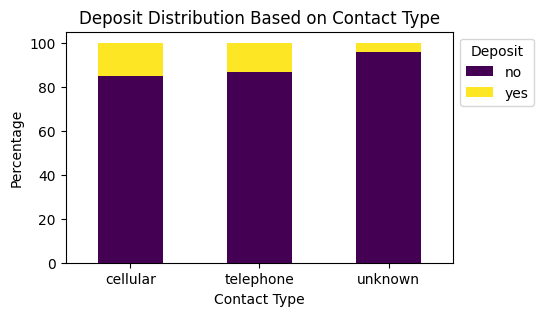

In [ ]:
contact_crosstab_percentage.plot(kind='bar', stacked=True, figsize=(5, 3), colormap="viridis")
plt.title("Deposit Distribution Based on Contact Type")
plt.xlabel("Contact Type")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")  

plt.show()

In [154]:
contact_crosstab_percentage = contact_crosstab.div(contact_crosstab.sum(axis=0), axis=1) * 100
contact_crosstab_percentage = contact_crosstab_percentage.reindex(contact_order)
contact_crosstab_percentage

y                 no        yes
contact                        
cellular   62.411703  82.605407
telephone   6.302289   7.373795
unknown    31.286008  10.020798

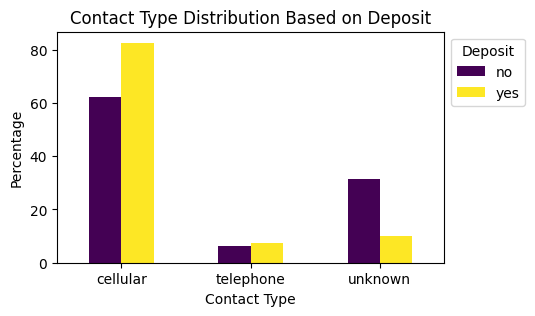

In [ ]:
contact_crosstab_percentage.plot(kind='bar', figsize=(5, 3), colormap="viridis")
plt.title("Contact Type Distribution Based on Deposit")
plt.xlabel("Contact Type")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")  

plt.show()

In [156]:
chi_square_tes(contact_crosstab)

Chi-square statistic for y with contact: 1035.7142253562922
P-value: 1.251738325340495e-225
Degrees of Freedom: 2
Is the relationship significant? Yes


## Temporal Factors

### 1. Day of Month

<Axes: xlabel='day', ylabel='Count'>

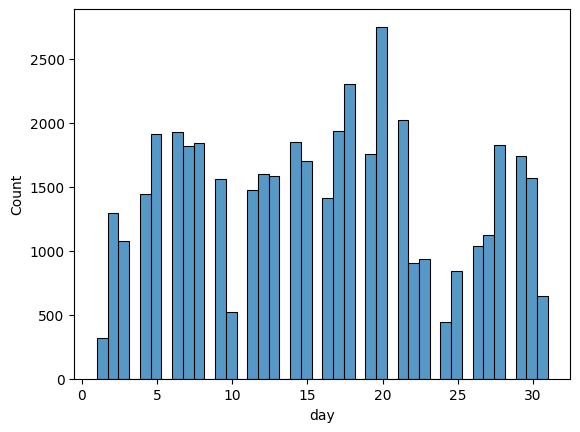

In [157]:
sns.histplot(x = 'day', data = bank_full)

In [158]:
def classify_day(day):
    if 1 <= day <= 10:
        return 'Beginning'
    elif 11 <= day <= 20:
        return 'Middle'
    else:
        return 'End'

In [159]:
day_dist = bank_full.copy()
day_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [160]:
day_dist['day_class'] = day_dist['day'].apply(classify_day)
day_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

         y  day_class  
0       no  Beginning  
1       no  Beginning  
2       no  Beginning  
3       no  Beginning  
4       no  Beginning  
...    ...        ...  
45206  yes     Middle  
45207  yes     Middle  
45208  yes     Middle  
45209   no     Middle  
45210   no     Middle  

[45211 rows x 18 columns]

In [161]:
day_order = ['Beginning', 'Middle', 'End']

In [162]:
day_dist_percentage = day_dist['day_class'].value_counts(normalize = True)*100
day_dist_percentage

day_class
Middle       40.673730
Beginning    30.357656
End          28.968614
Name: proportion, dtype: float64

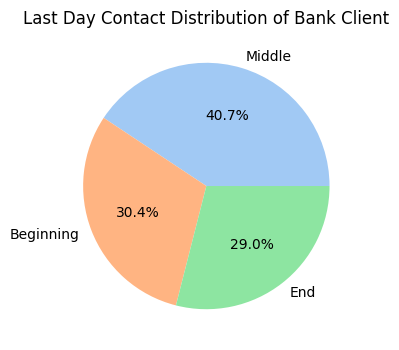

In [163]:
palette_color = sns.color_palette('pastel')

plt.figure(figsize=(4, 4))
plt.pie(day_dist_percentage,
        labels = day_dist_percentage.index,
        colors = palette_color,
        autopct = '%.1f%%')
plt.title("Last Day Contact Distribution of Bank Client")

plt.show()

In [164]:
day_crosstab = pd.crosstab(day_dist['day_class'], day_dist['y'], dropna = False).sort_values(by = 'yes', ascending = False)
day_crosstab

y             no   yes
day_class             
Middle     16365  2024
Beginning  11991  1734
End        11566  1531

In [165]:
day_crosstab_percentage = (day_crosstab / day_crosstab.values.sum() * 100)
day_crosstab_percentage =day_crosstab_percentage.reindex(day_order)
day_crosstab_percentage

y                 no       yes
day_class                     
Beginning  26.522307  3.835350
Middle     36.196943  4.476787
End        25.582270  3.386344

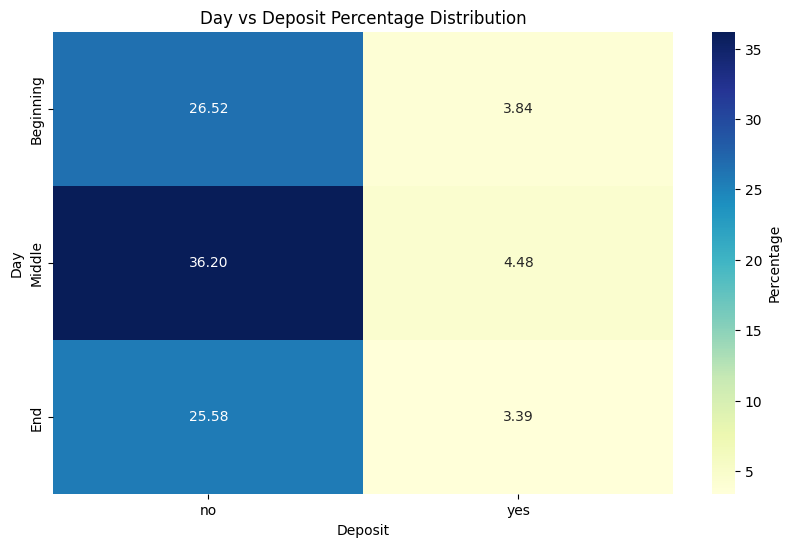

In [166]:
plt.figure(figsize=(10, 6))
sns.heatmap(day_crosstab_percentage, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title("Day vs Deposit Percentage Distribution")
plt.xlabel("Deposit")
plt.ylabel("Day")
plt.show()

In [167]:
day_crosstab_percentage = day_crosstab.div(day_crosstab.sum(axis=1), axis=0) * 100
day_crosstab_percentage =day_crosstab_percentage.reindex(day_order)
day_crosstab_percentage

y                no       yes
day_class                    
Beginning  87.36612  12.63388
Middle     88.99342  11.00658
End        88.31030  11.68970

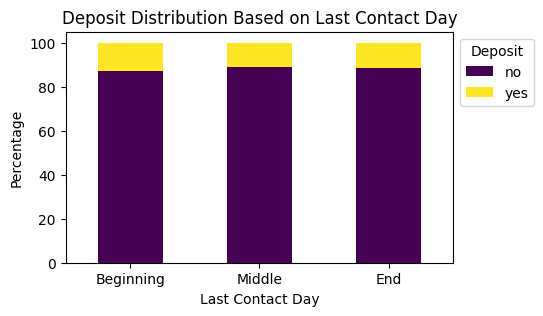

In [ ]:
day_crosstab_percentage.plot(kind='bar', stacked=True, figsize=(5, 3), colormap="viridis")
plt.title("Deposit Distribution Based on Last Contact Day")
plt.xlabel("Last Contact Day")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")

plt.show()

In [169]:
day_crosstab_percentage = day_crosstab.div(day_crosstab.sum(axis=0), axis=1) * 100
day_crosstab_percentage =day_crosstab_percentage.reindex(day_order)
day_crosstab_percentage

y                 no        yes
day_class                      
Beginning  30.036070  32.785026
Middle     40.992435  38.268104
End        28.971494  28.946871

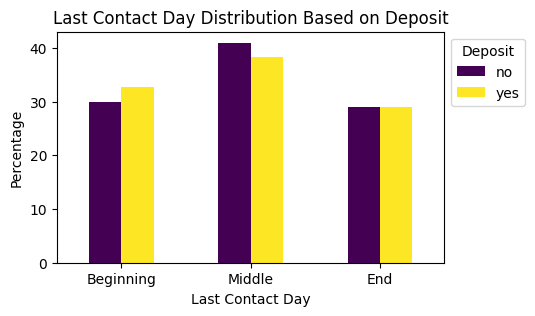

In [ ]:
day_crosstab_percentage.plot(kind='bar', figsize=(5, 3), colormap="viridis")
plt.title("Last Contact Day Distribution Based on Deposit")
plt.xlabel("Last Contact Day")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center") 

plt.show()

In [171]:
chi_square_tes(day_crosstab)

Chi-square statistic for y with day_class: 20.148523041739182
P-value: 4.2150604968404854e-05
Degrees of Freedom: 2
Is the relationship significant? Yes


### 2. Month

<Axes: xlabel='month', ylabel='Count'>

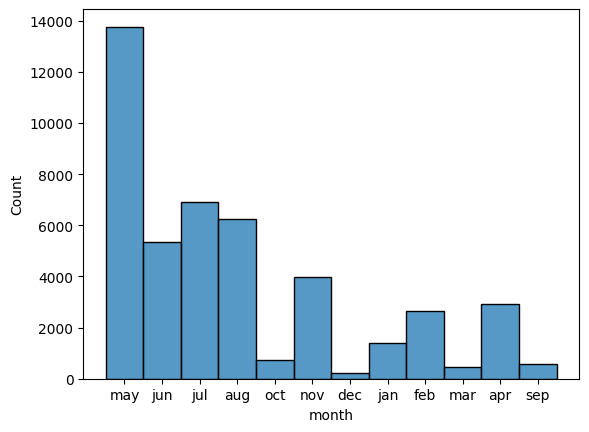

In [172]:
sns.histplot(x = 'month', data = bank_full)

In [173]:
month_dist = bank_full.copy()
month_dist

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [174]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec']

In [175]:
month_dist_percentage = month_dist['month'].value_counts(normalize = True)*100
month_dist_percentage = month_dist_percentage.reindex(month_order)
month_dist_percentage

month
jan     3.103227
feb     5.859194
mar     1.055053
apr     6.485147
may    30.448342
jun    11.813497
jul    15.250713
aug    13.817434
oct     1.632346
nov     8.781049
dec     0.473336
Name: proportion, dtype: float64

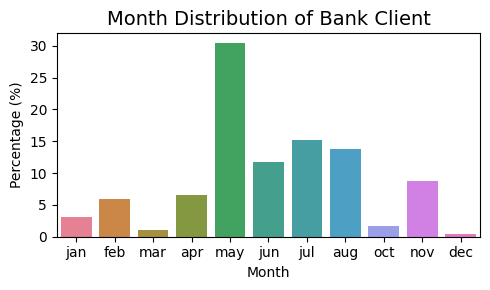

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(
    x=month_dist_percentage.index, 
    y=month_dist_percentage.values, 
    hue=month_dist_percentage.index
)

plt.title("Month Distribution of Bank Client", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Percentage (%)")
plt.tight_layout()
plt.show()

In [177]:
month_crosstab = pd.crosstab(month_dist['month'], month_dist['y'], dropna = False).sort_values(by = 'yes', ascending = False)
month_crosstab

y         no  yes
month            
may    12841  925
aug     5559  688
jul     6268  627
apr     2355  577
jun     4795  546
feb     2208  441
nov     3567  403
oct      415  323
sep      310  269
mar      229  248
jan     1261  142
dec      114  100

In [178]:
month_crosstab_percentage = (month_crosstab / month_crosstab.values.sum() * 100)
month_crosstab_percentage = month_crosstab_percentage.reindex(month_order)
month_crosstab_percentage

y             no       yes
month                     
jan     2.789144  0.314083
feb     4.883767  0.975426
mar     0.506514  0.548539
apr     5.208909  1.276238
may    28.402380  2.045962
jun    10.605826  1.207671
jul    13.863883  1.386831
aug    12.295680  1.521754
oct     0.917918  0.714428
nov     7.889673  0.891376
dec     0.252151  0.221185

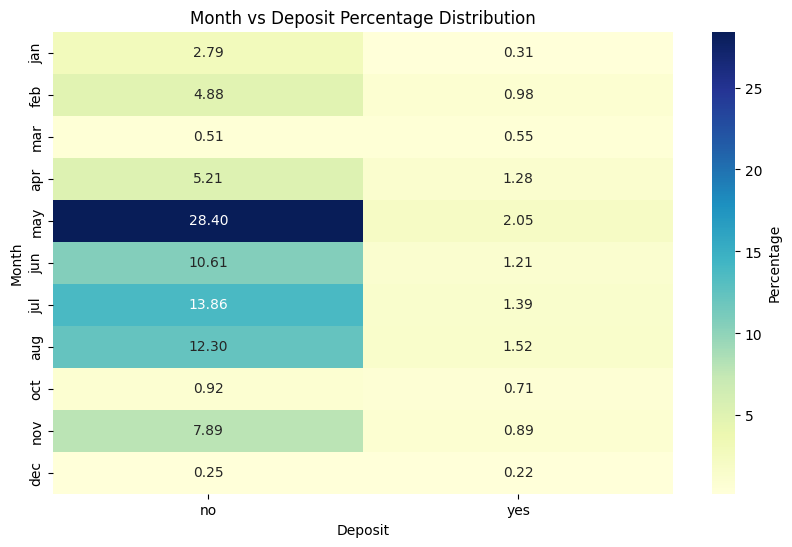

In [179]:
plt.figure(figsize=(10, 6))
sns.heatmap(month_crosstab_percentage, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title("Month vs Deposit Percentage Distribution")
plt.xlabel("Deposit")
plt.ylabel("Month")
plt.show()


In [180]:
month_crosstab_percentage = month_crosstab.div(month_crosstab.sum(axis=1), axis=0) * 100
month_crosstab_percentage = month_crosstab_percentage.reindex(month_order)
month_crosstab_percentage

y             no        yes
month                      
jan    89.878831  10.121169
feb    83.352208  16.647792
mar    48.008386  51.991614
apr    80.320600  19.679400
may    93.280546   6.719454
jun    89.777195  10.222805
jul    90.906454   9.093546
aug    88.986714  11.013286
oct    56.233062  43.766938
nov    89.848866  10.151134
dec    53.271028  46.728972

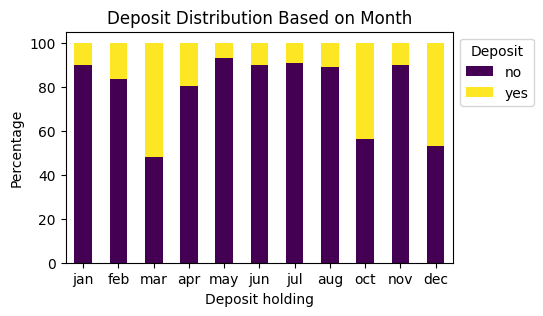

In [ ]:
month_crosstab_percentage.plot(kind='bar', stacked=True, figsize=(5, 3), colormap="viridis")
plt.title("Deposit Distribution Based on Month")
plt.xlabel("Deposit holding")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")  

plt.show()

In [182]:
month_crosstab_percentage = month_crosstab.div(month_crosstab.sum(axis=0), axis=1) * 100
month_crosstab_percentage = month_crosstab_percentage.reindex(month_order)
month_crosstab_percentage

y             no        yes
month                      
jan     3.158659   2.684818
feb     5.530785   8.338060
mar     0.573619   4.688977
apr     5.899003  10.909435
may    32.165222  17.489128
jun    12.010921  10.323313
jul    15.700616  11.854793
aug    13.924653  13.008130
oct     1.039527   6.107015
nov     8.934923   7.619588
dec     0.285557   1.890717

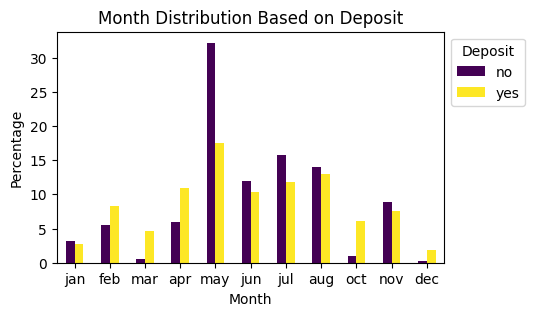

In [ ]:
month_crosstab_percentage.plot(kind='bar', figsize=(5, 3), colormap="viridis")
plt.title("Month Distribution Based on Deposit")
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.legend(title="Deposit", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, ha="center")  

plt.show()

In [184]:
chi_square_tes(month_crosstab)

Chi-square statistic for y with month: 3061.838938445269
P-value: 0.0
Degrees of Freedom: 11
Is the relationship significant? Yes


# Insight

## Demographic information

### 1. Age

Note:
- children = 0-14 years 
- early working age = 15-24 years
- prime working age = 25-54 years
- mature working age = 55-64 years
- elderly = 65 years and over

- 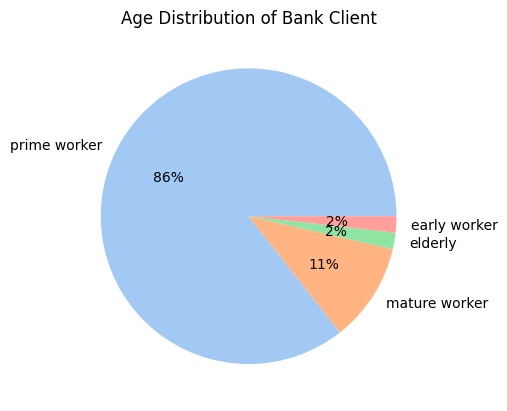
- 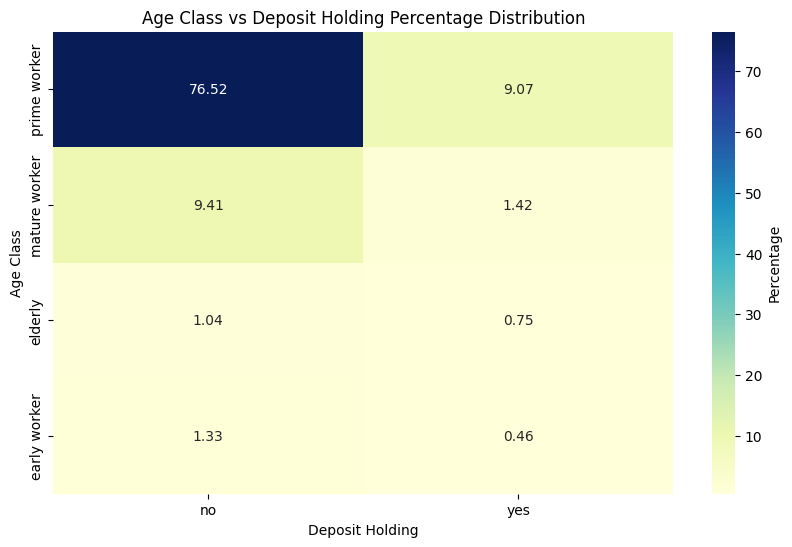
- 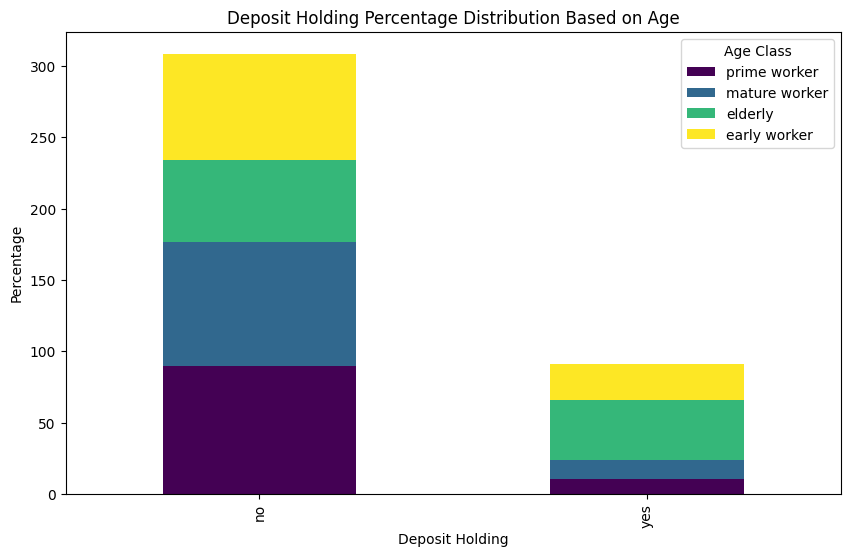
- 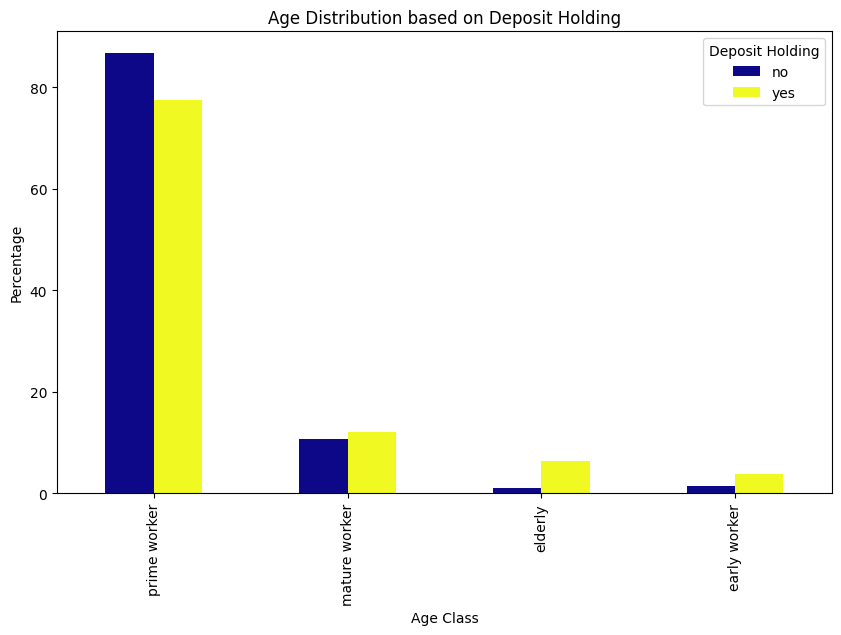

Distribusi Kelompok Usia:
- Mayoritas nasabah bank berada dalam kategori "prime worker" (85,59%), dengan persentase yang lebih kecil pada "mature worker" (10,83%), "elderly" (1,79%), dan "early worker" (1,79%).

Langganan Deposito Berdasarkan Kelompok Usia:
- "Prime worker" memiliki langganan deposito tertinggi, namun sebagian besar masih tidak memiliki deposito (89,4% tidak, 10,6% ya).
- Nasabah "elderly" menunjukkan proporsi tinggi dalam berlangganan deposito (42,1% ya), menunjukkan kelompok usia ini cenderung lebih memilih deposito dibandingkan yang lain.
- "Early worker" juga memiliki tingkat langganan sedang (25,6% ya), yang mungkin menunjukkan minat yang meningkat dalam menabung atau investasi.

Uji Chi-Square:
- Hasil uji chi-square menunjukkan hubungan yang sangat signifikan antara usia dan langganan deposito, mengonfirmasi bahwa usia berpengaruh signifikan terhadap kecenderungan memiliki deposito.

### 2. Job

- 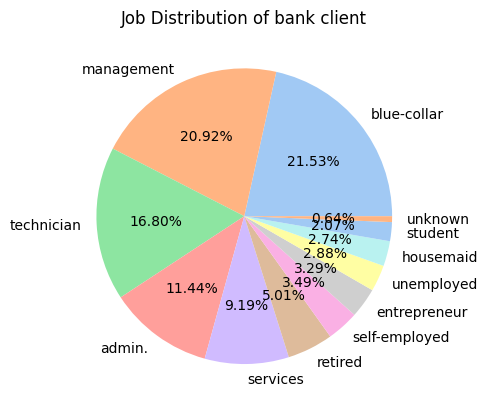
- 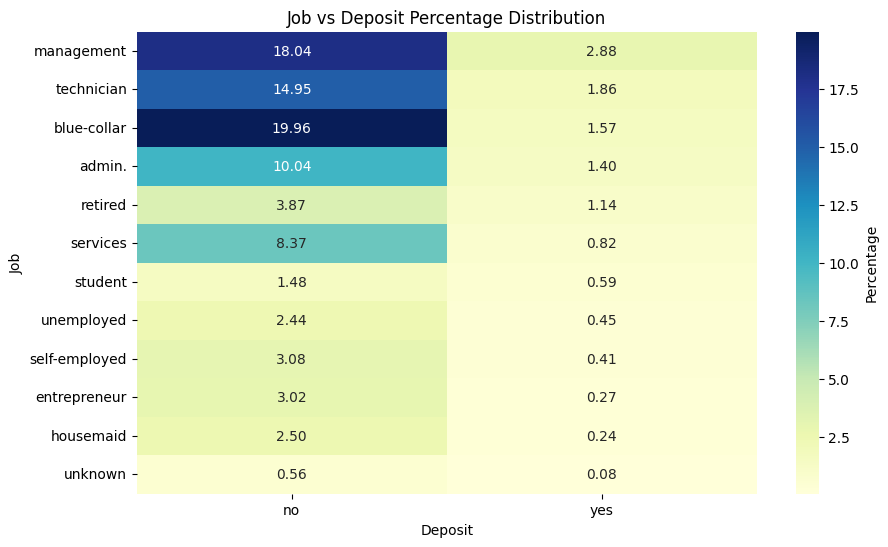
- 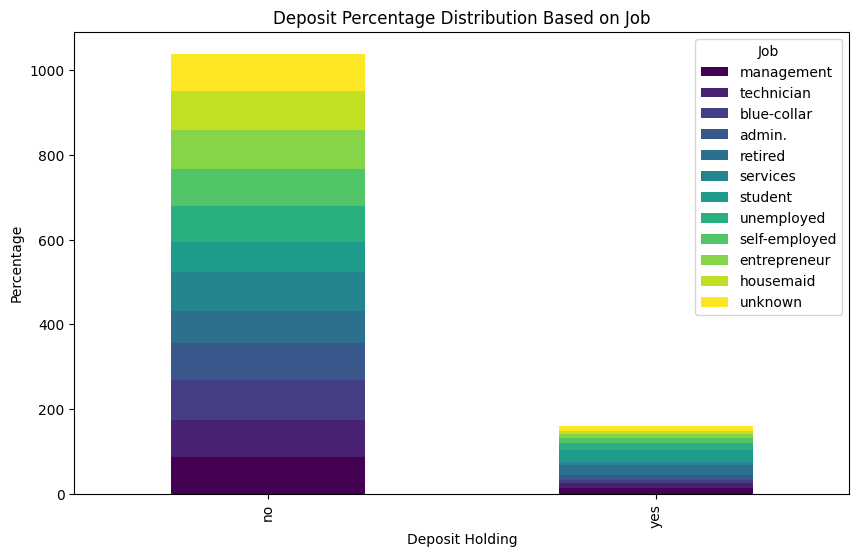
- 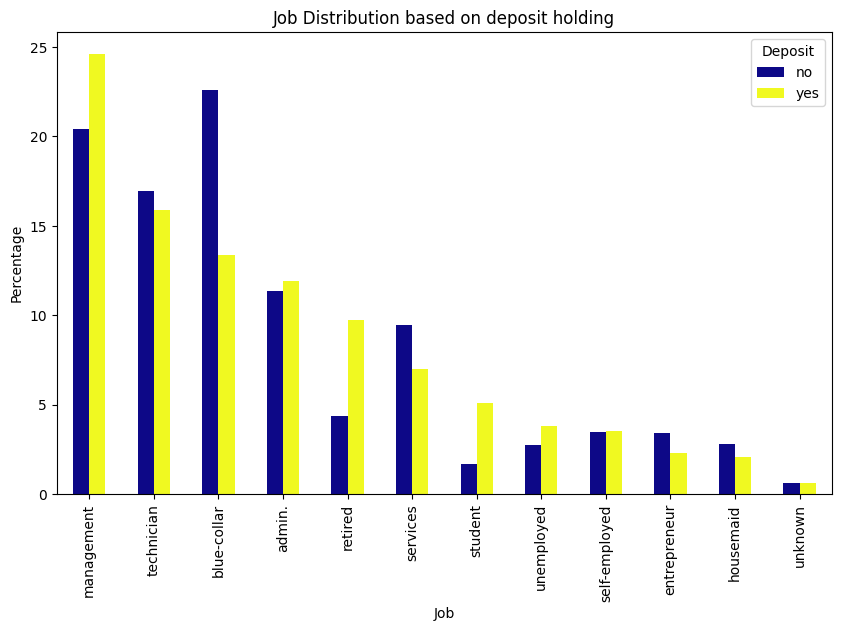

Proporsi Pekerjaan:
- Pekerjaan yang paling umum di antara nasabah adalah "blue-collar" (21,53%), "management" (20,92%), dan "technician" (16,80%), dengan proporsi yang lebih kecil pada peran seperti admin, layanan, dan pensiunan.

Langganan Deposito Berdasarkan Pekerjaan:
- "Student" memiliki tingkat langganan tertinggi (28,7% ya), yang mungkin menunjukkan kecenderungan untuk menabung sejak dini.
- "Retire" juga menunjukkan tingkat langganan deposito yang tinggi (22,8% ya), mencerminkan kemungkinan fokus pada tabungan selama pensiun.
- Pekerjaan  Management (24,6%) dan Teknisi (15,9%) memiliki persentase lebih  tinggi diantara pemegang deposit sedangkan "housemaid" (2,1%) dan "entreprenuer" (2,3%), mungkin karena variabilitas pendapatan atau prioritas keuangan yang berbeda.

Uji Chi-Square:
- Hasil uji chi-square yang signifikan menunjukkan bahwa jenis pekerjaan sangat berkaitan dengan kecenderungan langganan deposito, mencerminkan bagaimana pekerjaan memengaruhi perilaku menabung.

### 3. Marital Status

- 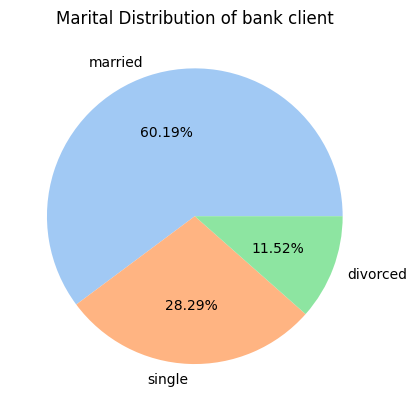
- 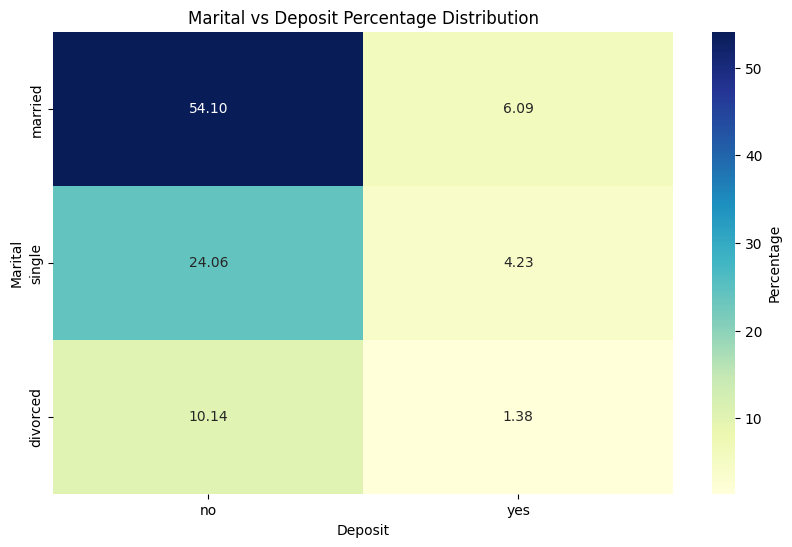
- 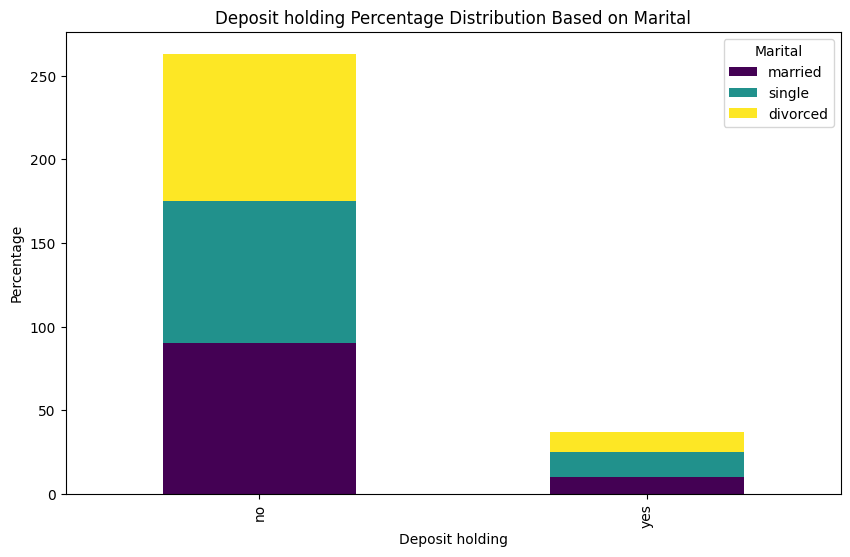
- 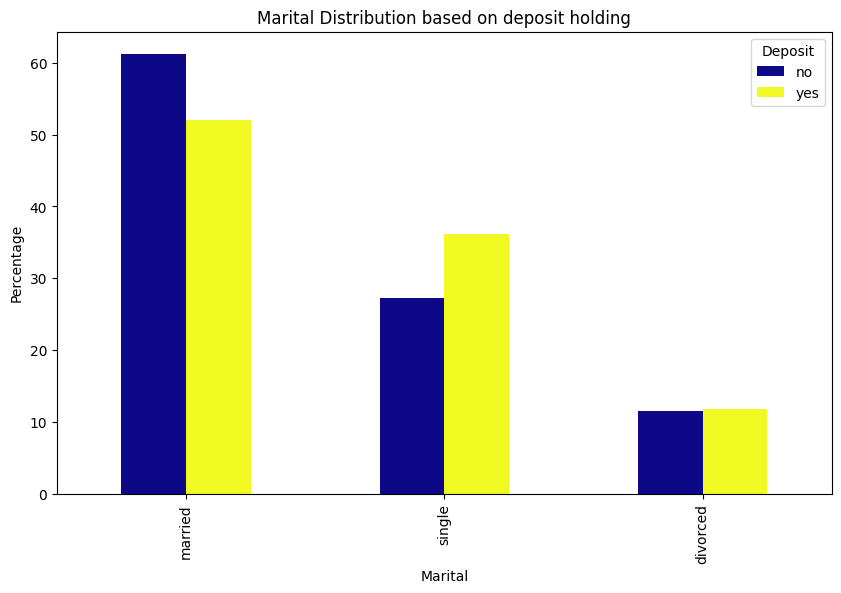

Proporsi Status Pernikahan:
- Nasabah yang 'married' mewakili kelompok terbesar (60,2%), diikuti oleh "single" (28,3%) dan "divorced" (11,5%).

Langganan Deposito Berdasarkan Status Pernikahan:
- Nasabah "single" menunjukkan proporsi langganan deposito tertinggi (14,95% ya), diikuti oleh yang "divorced" (11,95% ya), menunjukkan bahwa individu lajang mungkin memiliki lebih sedikit kewajiban finansial, memfasilitasi investasi dalam deposito.
- Nasabah yang "married" memiliki tingkat langganan deposito yang lebih rendah (10,1% ya), yang bisa mencerminkan pengeluaran rumah tangga yang lebih besar.
- 

Uji Chi-Square:
- Dengan nilai chi-square yang signifikan, status pernikahan memiliki dampak signifikan terhadap langganan deposito, kemungkinan disebabkan oleh komitmen finansial yang berbeda di antara kelompok-kelompok ini.

### 4. Education

- 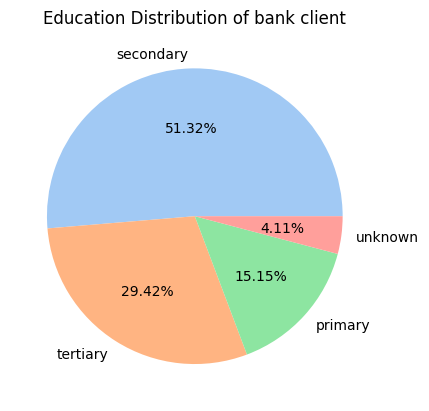
- 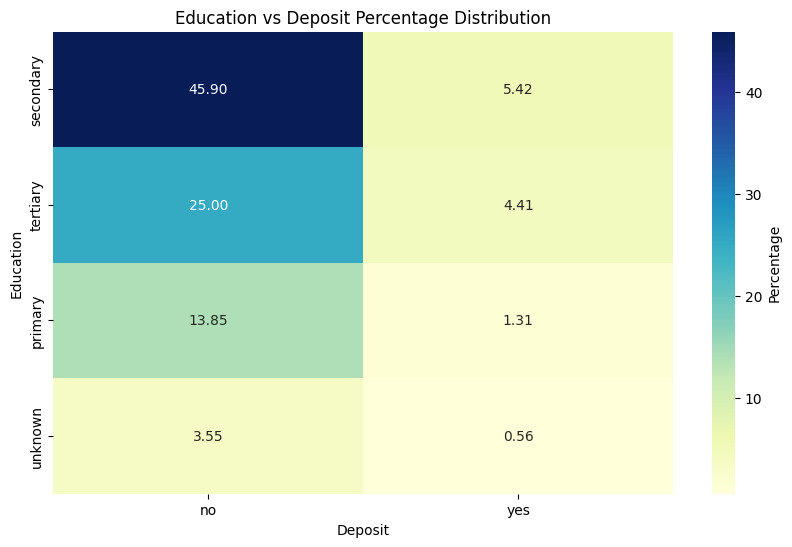
- 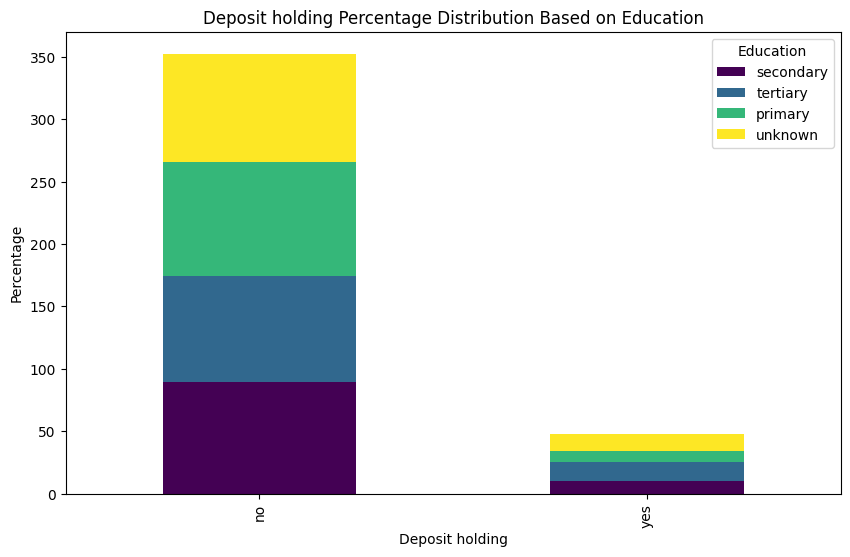
- 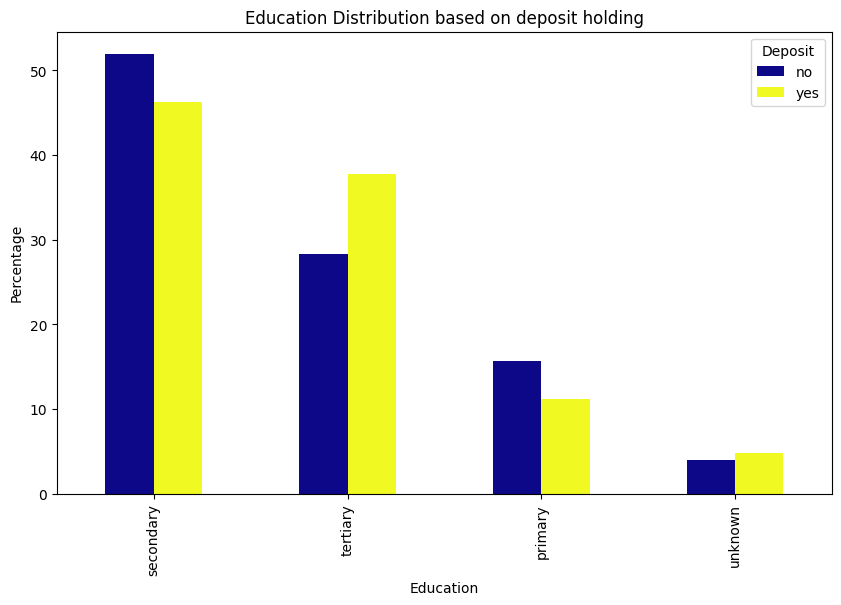

Proporsi Tingkat Pendidikan:
- Kelompok terbesar memiliki pendidikan menengah/secondary (51,3%), diikuti oleh pendidikan tinggi/teritary (29,4%), pendidikan dasar/primary (15,2%), dan tidak diketahui (4,1%).

Langganan Deposito Berdasarkan Tingkat Pendidikan:
- Nasabah dengan pendidikan tinggi menunjukkan tingkat langganan tertinggi (15,0% ya), yang dapat menunjukkan bahwa pendidikan yang lebih tinggi berkorelasi dengan literasi finansial atau tabungan yang lebih tinggi.
- Mereka dengan pendidikan dasar memiliki tingkat langganan yang lebih rendah (8,6% ya), mungkin karena keterbatasan pendapatan atau prioritas keuangan yang berbeda.

Uji Chi-Square:
- Statistik chi-square yang signifikan menunjukkan bahwa tingkat pendidikan merupakan faktor signifikan dalam keputusan berlangganan deposito, kemungkinan karena pengaruh pendidikan pada pengetahuan finansial dan pendapatan.

### 5. Summary

Dari seluruh faktor demografis (usia, pekerjaan, status pernikahan, dan pendidikan) terdapat hubungan yang sangat signifikan dengan langganan deposito. Meliputi:
- Kelompok usia yang lebih tua (lanjut usia dan pensiunan) dan tingkat pendidikan yang lebih tinggi umumnya berkaitan dengan tingkat langganan deposito yang lebih tinggi.
- Individu lajang dan mahasiswa juga menunjukkan kecenderungan lebih kuat terhadap langganan deposito, mungkin karena lebih sedikit kewajiban finansial dan pengetahuan terhadap perencanaan keuangan dini.

Rekomendasi target campaign (berdasarkan demografi dan tingkat langganan yg masih rendah) dengan mungkin menyesuaikan produk sesuai dengan situasi dan kebutuhan keuangan mereka:
- pekerja kasar / blue-collar
- individu yang menikah
- Individu dengan pendidikan menengah 

## Economic Information

### 1. Default

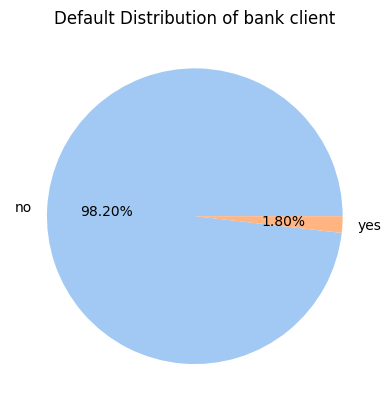
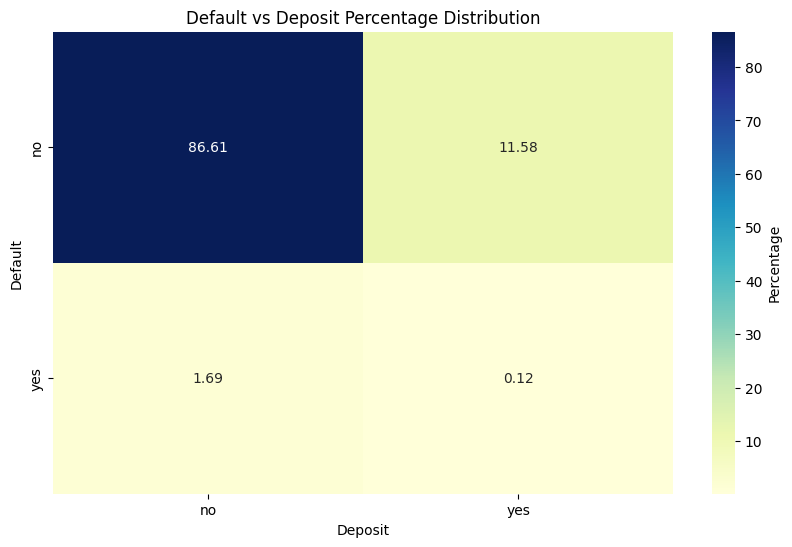
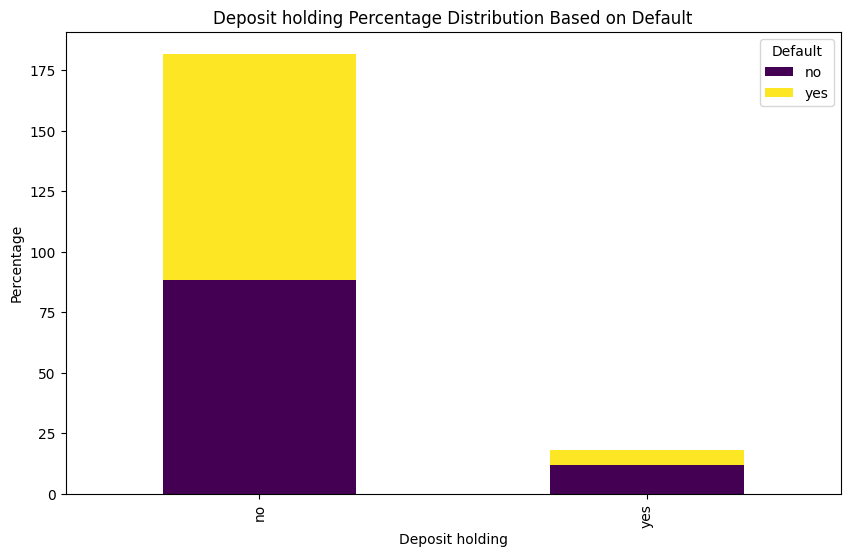
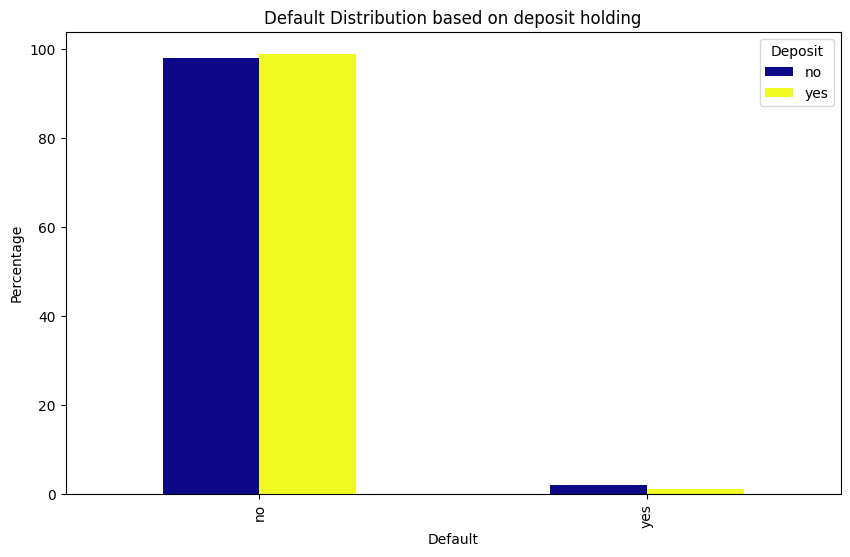

Proporsi Default (gagal bayar kredit):
- Sebagian besar nasabah (98,2%) tidak memiliki default, sementara hanya 1,8% yang memiliki.

Langganan Deposito Berdasarkan Default:
- Di antara client yang tidak memiliki default, 11,6% telah berlangganan deposito berjangka.
- Di antara yang memiliki default, hanya 0,1% yang berlangganan.

Uji Chi-Square:
- Menunjukkan hasil yang signifikan secara statistik, yang berarti terdapat hubungan signifikan antara gagal bayar kredit dan langganan deposito berjangka. Nasabah tanpa default lebih mungkin untuk berlangganan dibandingkan dengan yang memiliki gagal bayar.

### 2. Balance

Note:
- Overdrawn = < 0 
- Low Balance = 0 - $71 
- Moderate Balance = $72 - $1427 
- High Balance = $1428 - $9999 
- Very High Balance = $10000 and over

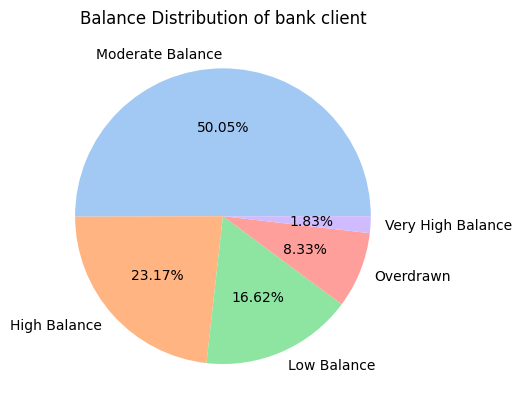
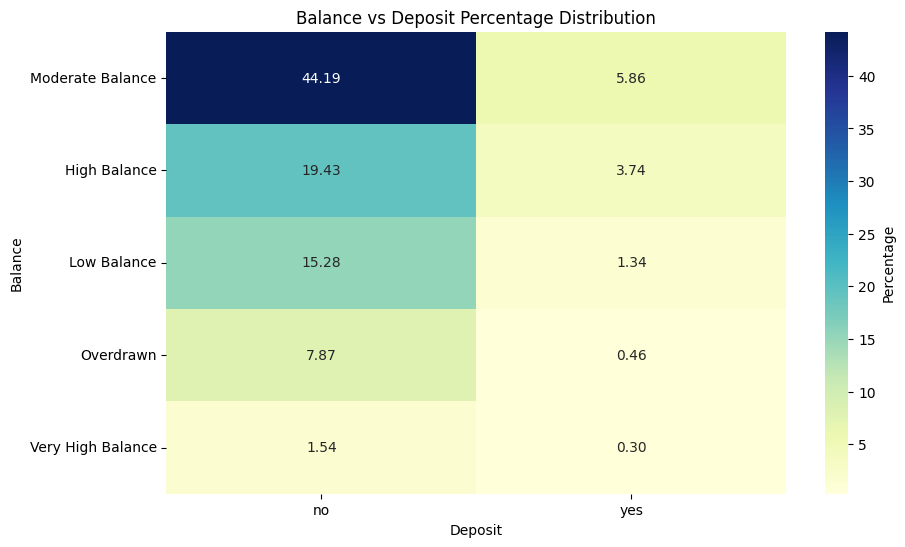
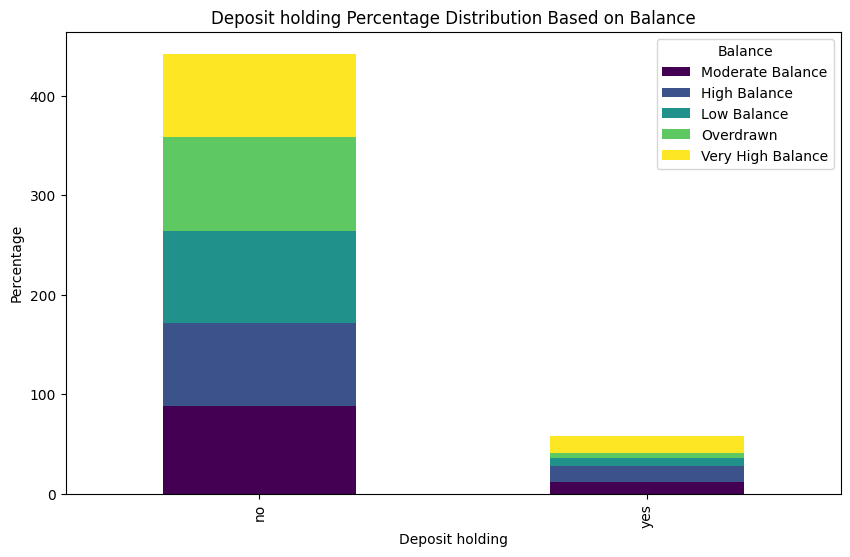
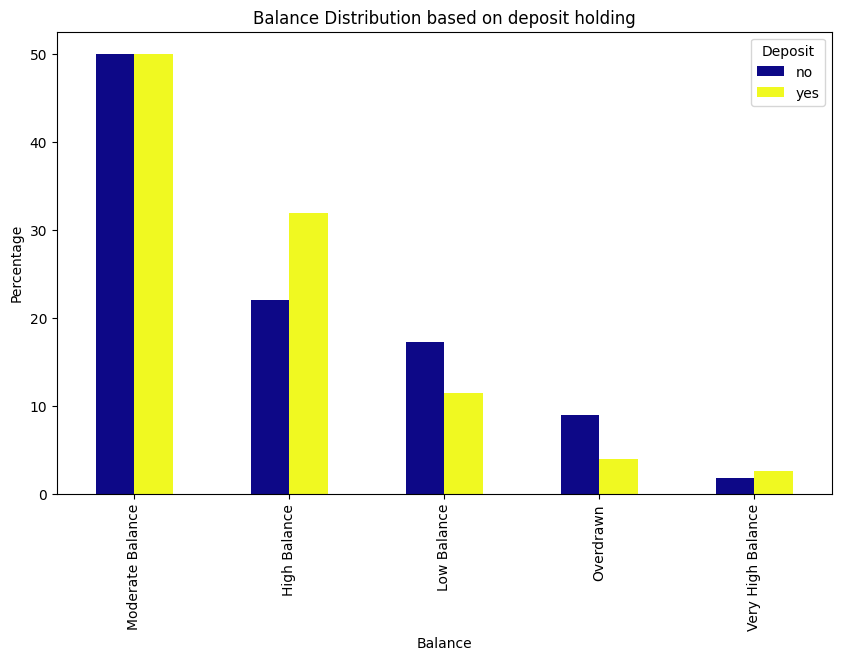

Proporsi Balance:
- Sebagian besar nasabah memiliki "Saldo Sedang" (50,1%), diikuti oleh "Saldo Tinggi" (23,2%), "Saldo Rendah" (16,6%), "Saldo Negatif" (8,3%), dan "Saldo Sangat Tinggi" (1,8%).

Langganan Deposito Berdasarkan Saldo:
- Nasabah dengan kategori saldo yang lebih tinggi lebih mungkin untuk berlangganan deposito berjangka
- 16,1% dari mereka dengan "Saldo Tinggi" telah berlangganan.
- 16,3% dari mereka dengan "Saldo Sangat Tinggi" telah berlangganan.
- Kelompok "Saldo Negatif" menunjukkan tingkat langganan rendah sebesar 5,6%, yang menunjukkan bahwa nasabah dengan dana terbatas cenderung menghindari deposito berjangka.

Uji Chi-Square:
- Menunjukkan hubungan yang signifikan antara tingkat saldo dan langganan deposito berjangka. Saldo yang lebih tinggi dikaitkan dengan kemungkinan langganan yang lebih besar.

### 3. Housing or loan

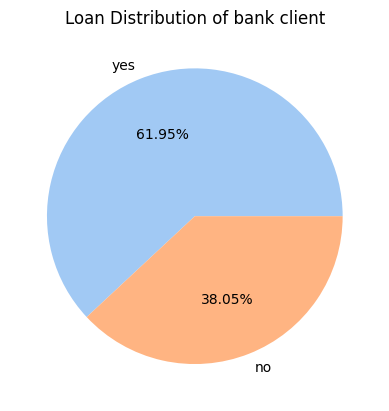
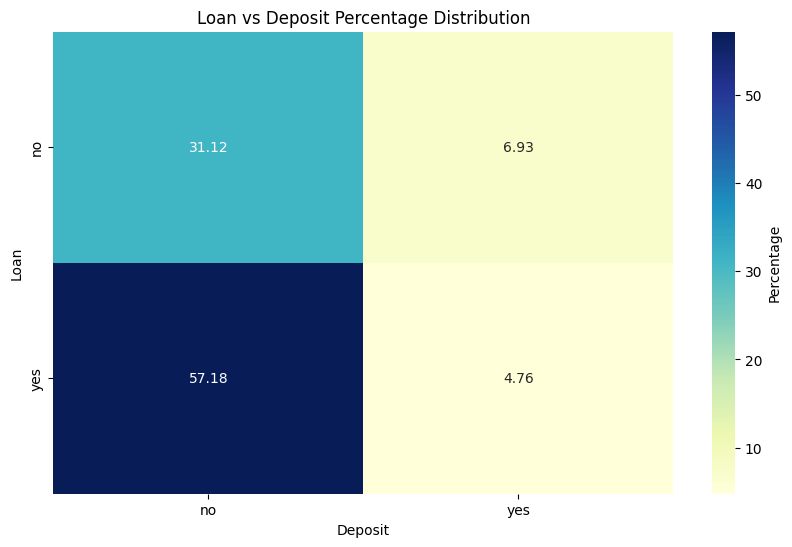
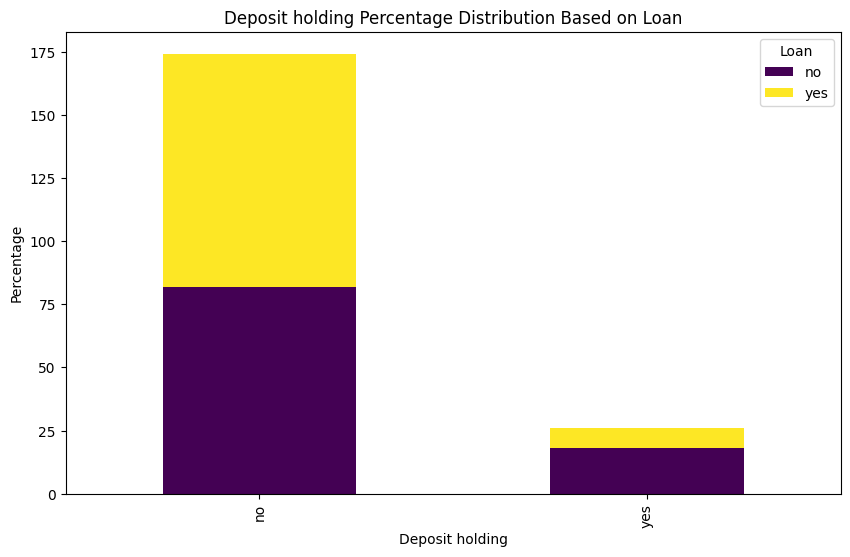
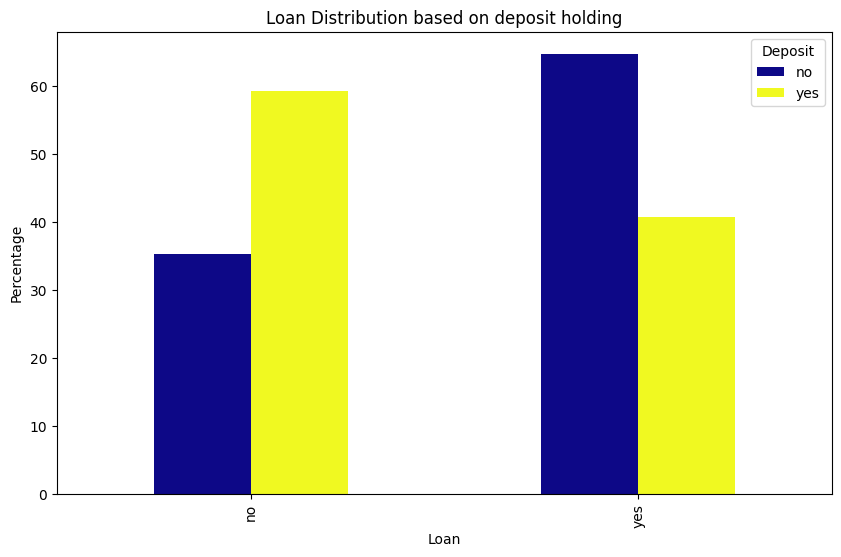

Proporsi Loan:
- Mayoritas nasabah (61,9%) memiliki pinjaman, sementara 38,1% tidak.

Langganan Deposito Berdasarkan Loan:
- Nasabah tanpa pinjaman lebih mungkin untuk berlangganan deposito berjangka (18,2%) dibandingkan mereka yang memiliki pinjaman (7,7%).
- Tren ini menunjukkan bahwa nasabah yang tidak memiliki kewajiban finansial (loan) lebih cenderung berinvestasi dalam deposito berjangka.

Uji Chi-Square:
- Menunjukkan hubungan yang signifikan antara status pinjaman dan langganan deposito berjangka. Nasabah tanpa pinjaman secara signifikan lebih mungkin untuk berlangganan.

### 5. Summary

Dari seluruh faktor ekonomi (default, balance, loan) terdapat hubungan yang sangat signifikan dengan langganan deposito. Meliputi:
- Default: Nasabah tanpa default lebih mungkin untuk berlangganan deposito berjangka.
- Balance: Saldo yang lebih tinggi berkorelasi dengan kemungkinan berlangganan deposito berjangka yang lebih besar.
- Loan: Nasabah tanpa pinjaman secara signifikan lebih mungkin untuk berlangganan deposito berjangka.

Indikator stabilitas ekonomi (default, balance, loan) sangat memengaruhi kemungkinan nasabah untuk berinvestasi dalam deposito berjangka. Karena itu direkomendasikan untuk menargetkan pemasaran deposito berjangka kepada nasabah dengan profil ekonomi yang lebih stabil.

## Past Campaign Interactions

### 1. Campaign

Note:
- Low Frequency = 1
- Moderate Frequency = 2 - 3 
- High Frequency = 4 - 10 
- Very HighFrequency = 11 and over

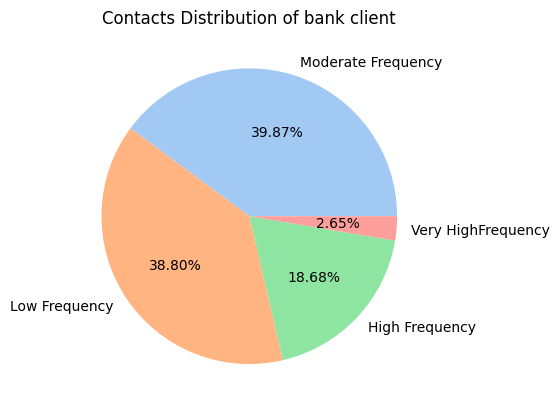
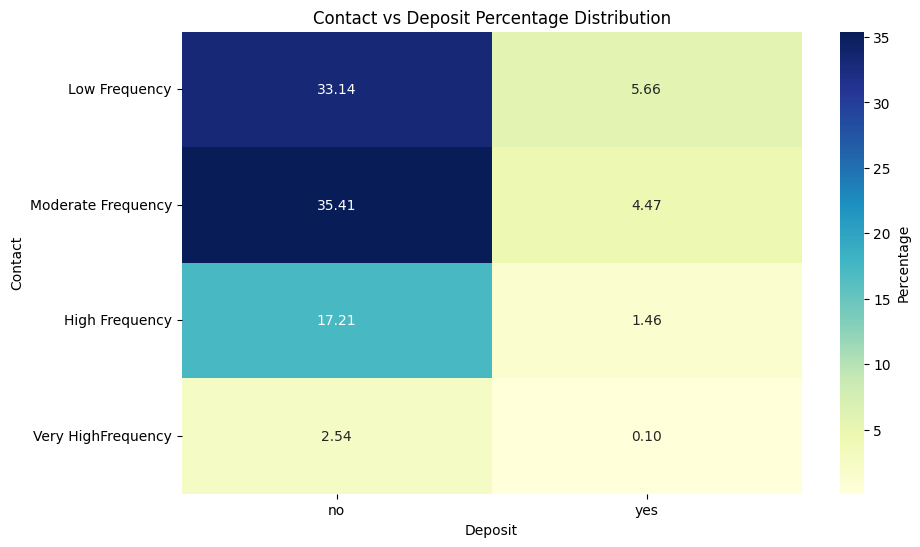
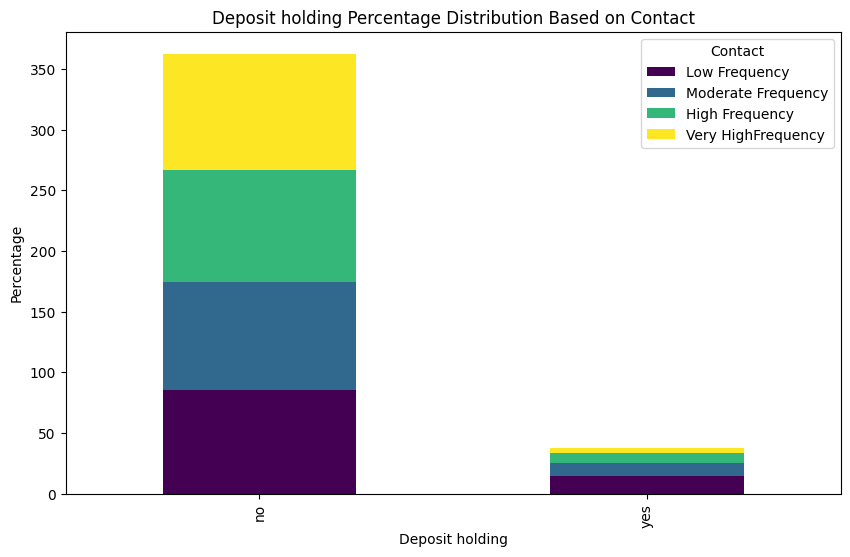
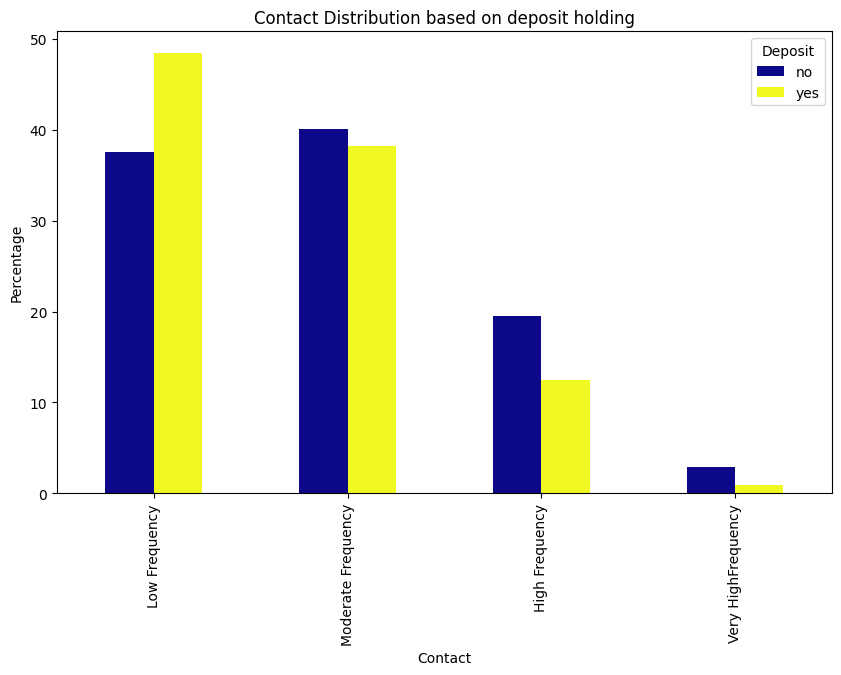

Proporsi Kontak:
- Sebagian besar nasabah berada dalam kategori "Frekuensi Sedang" (39,9%) atau "Frekuensi Rendah" (38,8%), diikuti oleh "Frekuensi Tinggi" (18,7%) dan "Frekuensi Sangat Tinggi" (2,6%).

Langganan Deposito Berdasarkan Kontak:
- Nasabah yang dihubungi lebih sedikit kali (Frekuensi Rendah) lebih mungkin untuk berlangganan deposito berjangka (14,6%) dibandingkan dengan nasabah yang dihubungi lebih sering:
    - Frekuensi Sedang: 11,2%
    - Frekuensi Tinggi: 7,8%
    - Frekuensi Sangat Tinggi: 3,9%
- Hal ini menunjukkan bahwa menghubungi nasabah terlalu sering dapat mengurangi kemungkinan mereka berlangganan, kemungkinan karena rasa terganggu atau kurangnya minat.

Uji Chi-Square:
- Menunjukkan hubungan antara jumlah kontak dan langganan deposito adalah signifikan secara statistik. Kemungkinan berlangganan menurun seiring meningkatnya frekuensi kontak.

### 2. Poutcome

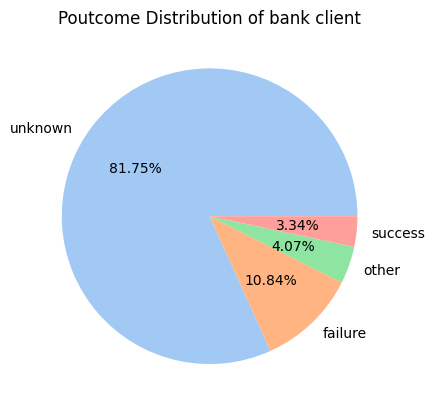
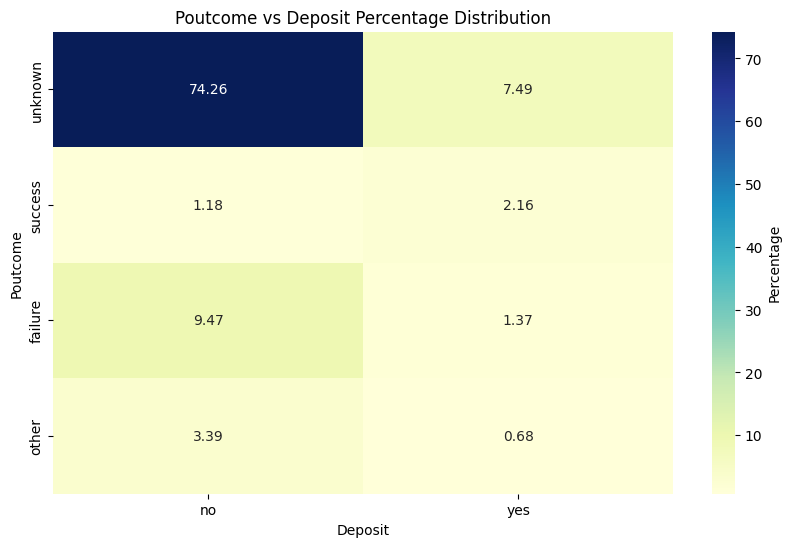
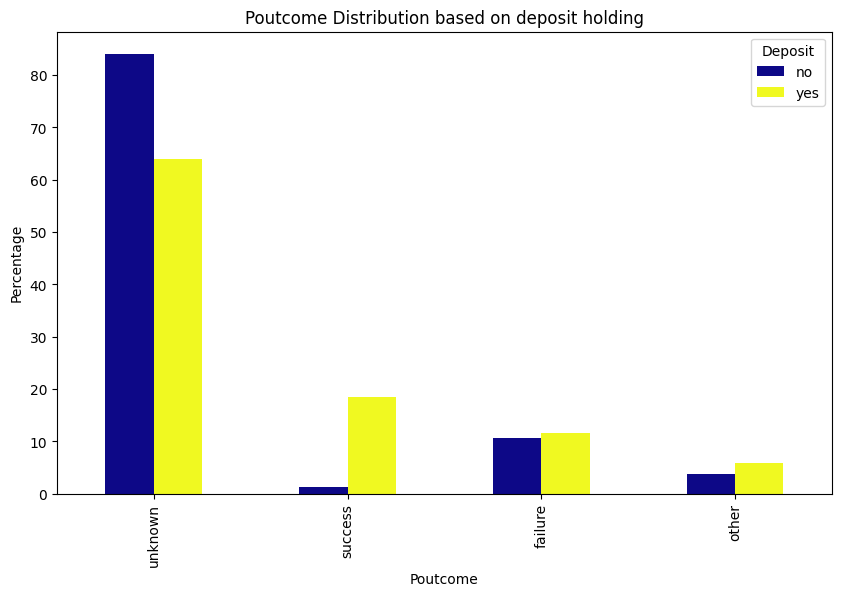
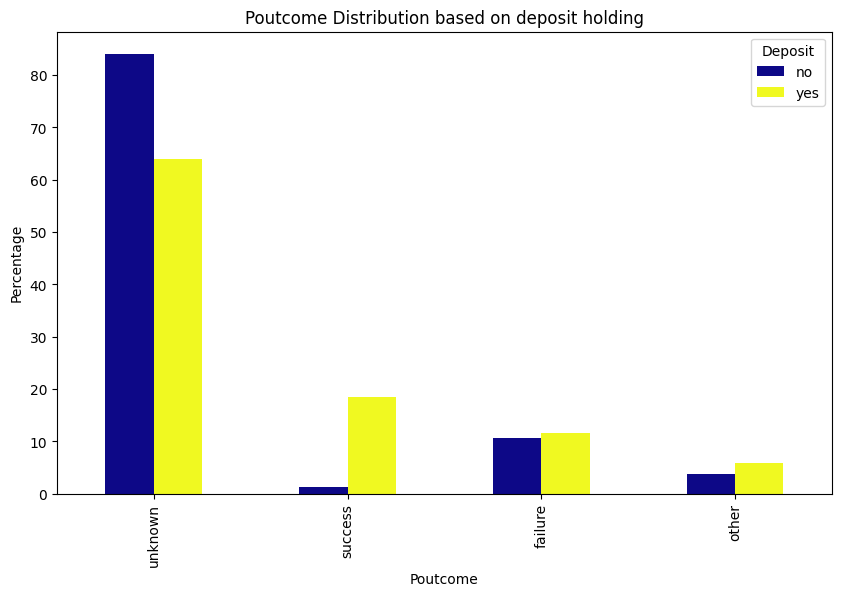

Proporsi Poutcome:
- Sebagian besar nasabah masuk dalam kategori "tidak diketahui" (81,7%), di mana hasil dari campaign sebelumnya tidak tercatat.
Kelompok yang lebih kecil meliputi:
   - Gagal: 10,8%
   - Lainnya: 4,1%
   - Berhasil: 3,3%

Langganan Deposito Berdasarkan Kontak:
- Nasabah dengan hasil "berhasil" dalam campaign sebelumnya paling mungkin untuk berlangganan deposito berjangka (64,7%). Untuk hasil lainnya:
    - Gagal: 12,6%
    - Lainnya: 16,7%
    - Tidak diketahui: 9,2%
- Hal ini menunjukkan bahwa keberhasilan dalam campaign sebelumnya sangat memengaruhi kemungkinan berlangganan.

Uji Chi-Square:
- Menunjukkan hubungan yang sangat kuat antara hasil campaign sebelumnya dan langganan deposito berjangka. Hasil "berhasil" adalah prediktor yang sangat signifikan.

### 3. Summary

Dari seluruh faktor interaksi campaign sebelumnya (campaign, poutcome) terdapat hubungan yang sangat signifikan dengan langganan deposito. Meliputi:
- Campaign / Contact:
Menghubungi nasabah secara berlebihan bisa menjadi kontraproduktif. Nasabah dalam kategori "Frekuensi Rendah" paling mungkin berlangganan deposito berjangka, yang menunjukkan pentingnya penargetan strategis dan menghindari tindak lanjut yang berlebihan.
- Poutcome:
Hasil "berhasil" dalam campaign sebelumnya secara signifikan meningkatkan kemungkinan berlangganan. Memahami dan menerapkan kembali strategi dari campaign sebelumnya yang sukses dapat meningkatkan efektivitas campaign mendatang.
- Unknown output:
Proporsi besar dari hasil "tidak diketahui" menunjukkan potensi kesenjangan dalam tracking hasil campaign. Meningkatkan pengumpulan data dan analisis untuk campaign sebelumnya dapat memberikan wawasan yang lebih dapat ditindaklanjuti.

Rekomendasi:
- Optimalkan Frekuensi Kontak:
Batasi jumlah kontak tindak lanjut ke angka yang wajar, dengan menargetkan kategori "Frekuensi Rendah" untuk tingkat keterlibatan yang lebih baik.
- Manfaatkan Keberhasilan Historis:
Fokus pada nasabah yang memiliki hasil "berhasil" dalam campaign sebelumnya. Gunakan kelompok ini sebagai acuan untuk menyempurnakan strategi penargetan bagi nasabah serupa.
- Tingkatkan Kelengkapan Data:
Atasi tingginya persentase hasil "tidak diketahui" dengan meningkatkan mekanisme pencatatan dan umpan balik campaign untuk memahami interaksi masa lalu dengan lebih baik.

## Engagement Level

### 1. Duration

Note (in seconds):
- Very Short = 0 - 60
- Short = 61 - 180
- Moderate = 181 - 319
- Long = 320 - 600
- Very Long = 601 and over

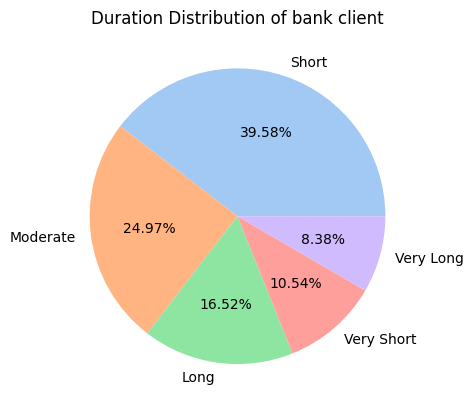
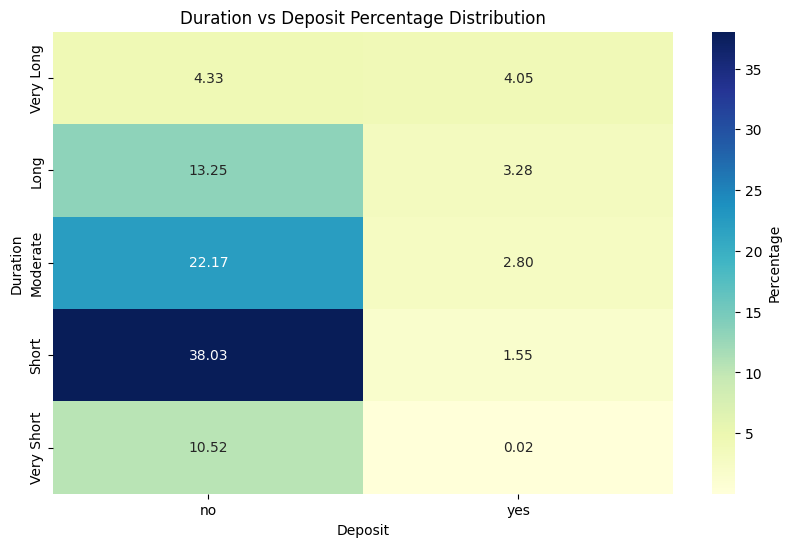
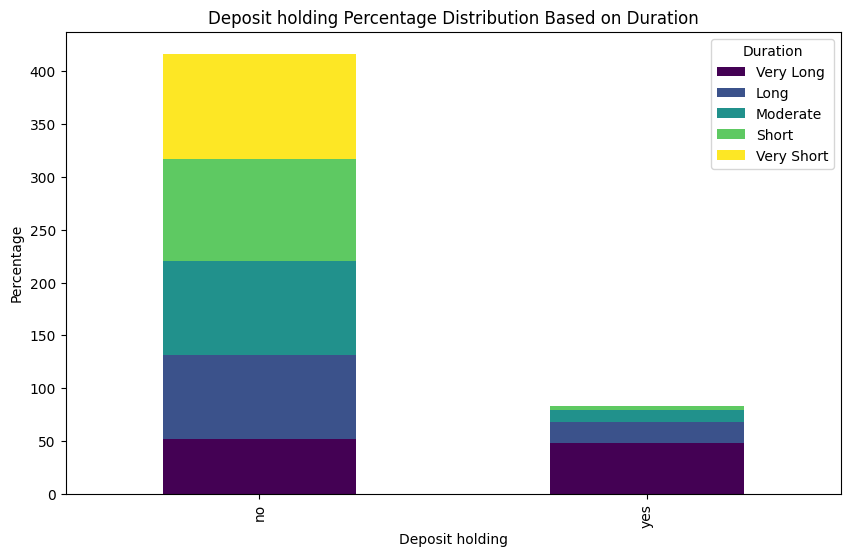
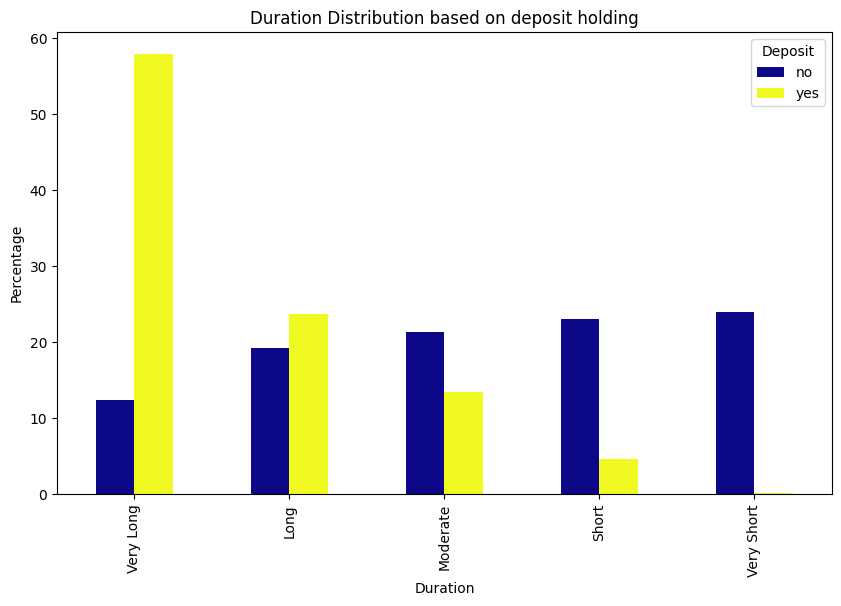

Proporsi Duration:
- Sebagian besar nasabah berada dalam kategori durasi "Pendek" (39,6%) dan "Sedang" (25%), dengan sebagian kecil berada dalam kategori "Sangat Panjang" (8,4%) dan "Sangat Pendek" (10,5%).
- Ini menunjukkan bahwa sebagian besar interaksi nasabah relatif singkat, dengan sedikit nasabah yang memiliki durasi kontak yang lebih lama.

Langganan Deposito Berdasarkan durasi:
- Nasabah dengan durasi "Sangat Panjang" memiliki kemungkinan tertinggi untuk berlangganan deposito berjangka (48,4%), diikuti oleh:
    - Durasi Panjang: 19,8%
    - Durasi Sedang: 11,2%
    - Durasi Pendek: 3,9%
    - Durasi Sangat Pendek: 0,2%
- Pola ini menunjukkan adanya korelasi kuat antara durasi kontak dan kemungkinan berlangganan, di mana percakapan yang lebih lama tampak lebih efektif dalam mengonversi nasabah.

Uji Chi-Square:
- Menunjukkan hubungan yang signifikan secara statistik antara durasi kontak dan langganan deposito berjangka, yang menunjukkan bahwa durasi yang lebih lama bernilai untuk meningkatkan keterlibatan dan konversi.

### 2. Contact Type

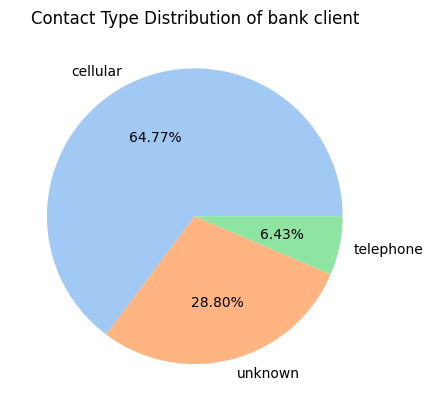
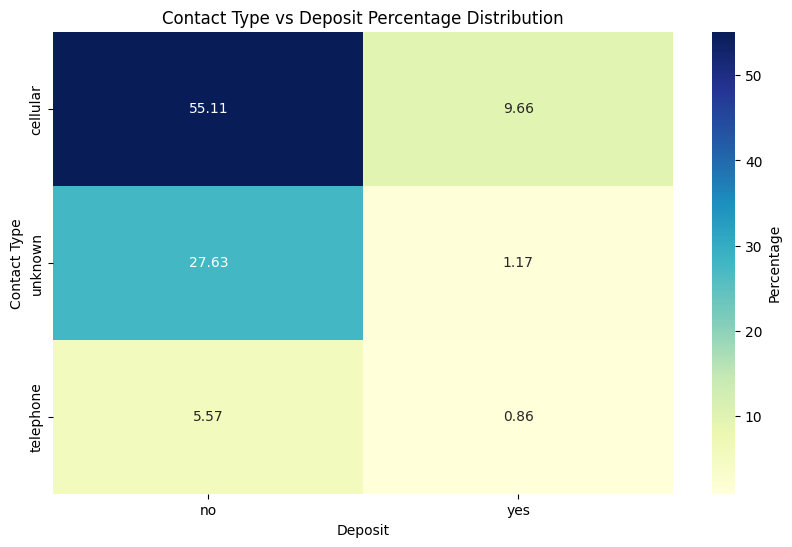
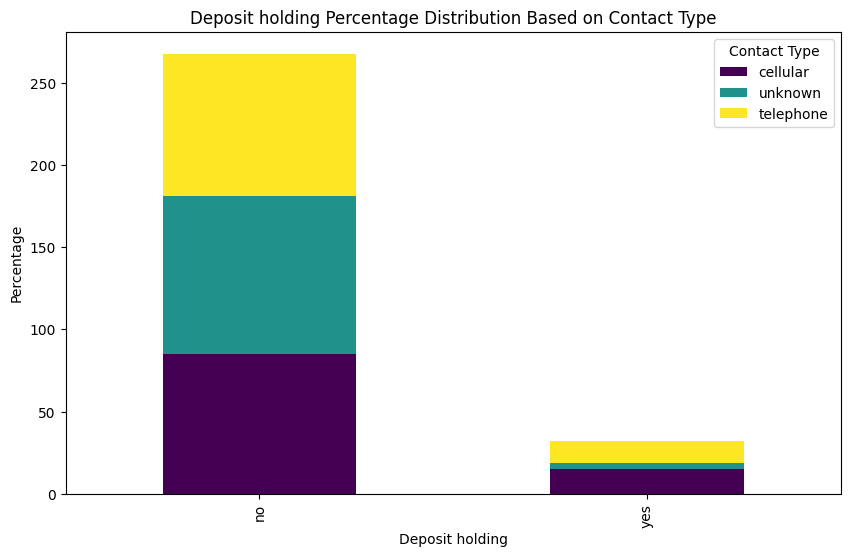
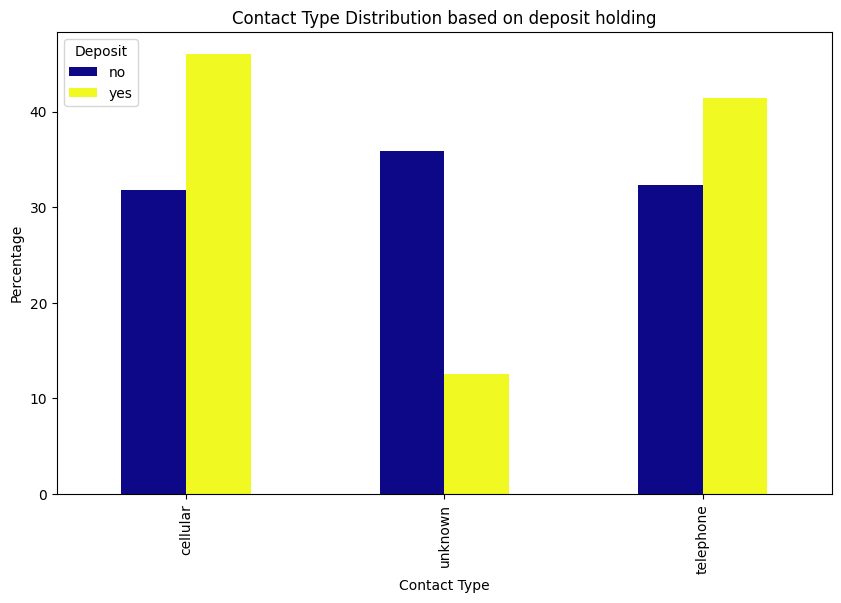

Proporsi Contact Type:
- Sebagian besar nasabah dihubungi melalui "seluler" (64,8%), diikuti oleh kategori "tidak diketahui" (28,8%) dan "telepon" (6,4%).

Langganan Deposito Berdasarkan tipe kontak:
- Kemungkinan berlangganan deposito berjangka bervariasi berdasarkan jenis kontak:
    - Seluler: 14,9% dari nasabah yang dihubungi melalui seluler berlangganan.
    - Telepon: 13,4% berlangganan.
    - Tidak Diketahui: 4,1% berlangganan.
- Nasabah yang dihubungi melalui metode seluler atau telepon menunjukkan tingkat konversi lebih tinggi dibandingkan dengan metode kontak tidak diketahui. Hal ini menunjukkan bahwa metode komunikasi langsung (seperti seluler atau telepon) lebih efektif.

Uji Chi-Square:
- Menunjukkan hubungan antara jenis kontak dan langganan deposito berjangka signifikan secara statistik, menyoroti pentingnya metode kontak dalam keterlibatan nasabah.

### 3. Summary

Dari seluruh faktor engagement (duration, contact) terdapat hubungan yang sangat signifikan dengan langganan deposito. Meliputi:
- Durasi Kontak:
    - Durasi kontak yang lebih lama berkaitan dengan tingkat konversi yang lebih tinggi. Untuk nasabah yang dapat diajak berinteraksi dalam percakapan yang lebih lama, peluang berlangganan deposito berjangka jauh lebih tinggi.
    - Fokuskan upaya pada nasabah yang bersedia berinteraksi dalam percakapan lebih panjang, karena interaksi ini lebih produktif dalam menghasilkan langganan.
- Jenis Kontak:
    - Kontak melalui seluler dan telepon menghasilkan tingkat konversi yang lebih baik dibandingkan dengan jenis kontak yang tidak diketahui. Metode kontak langsung tampak krusial untuk keterlibatan dan konversi nasabah yang efektif.
    - Prioritaskan saluran komunikasi seluler atau telepon, terutama saat mencoba mengonversi nasabah menjadi pelanggan deposito berjangka.

Rekomendasi:
- Latih dan siapkan staf untuk memaksimalkan durasi percakapan, misal dengan fokus pada edukasi nasabah tentang manfaat atau menangani kekhawatiran terhadap produk yang ditawarkan.
- Kurangi ketergantungan pada metode kontak yang tidak diketahui atau kurang langsung dalam campaign mendatang, karena metode ini cenderung menghasilkan tingkat langganan yang lebih rendah.

## Temporal Factors

### 1. Day of Month

Note (date):
- Beginning = 1 - 10
- Middle = 11 - 20
- End = 21 and Over

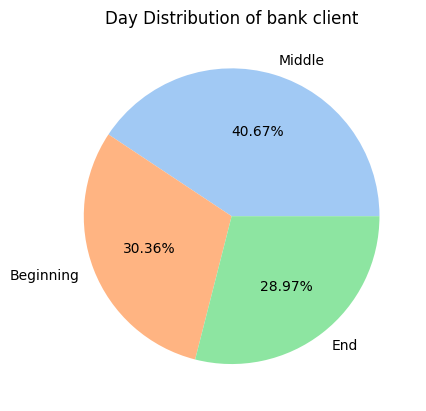
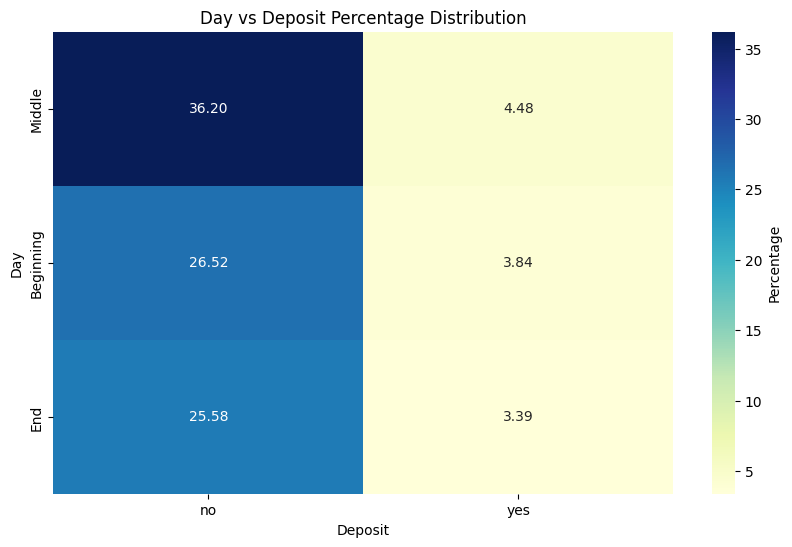
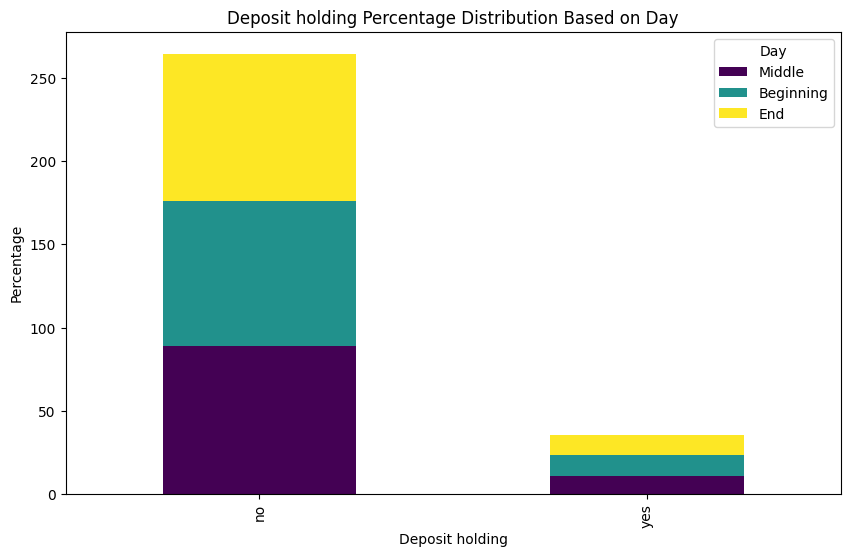
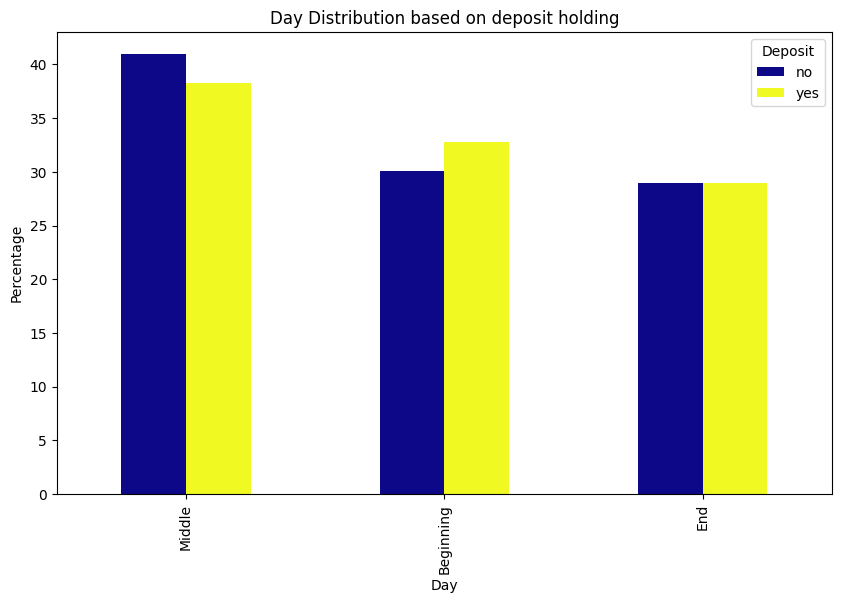

Proporsi Hari:
- Nasabah paling sering dihubungi pada pertengahan bulan (40,7%), diikuti oleh awal bulan (30,4%) dan akhir bulan (29%).
- Hal ini menunjukkan sedikit fokus lebih besar pada keterlibatan nasabah selama periode pertengahan bulan.

Langganan Deposito Berdasarkan hari:
- Kemungkinan berlangganan deposito berjangka tertinggi untuk nasabah yang dihubungi pada awal bulan (12,6%), dibandingkan dengan pertengahan (11%) dan akhir bulan (11,7%).
- Meskipun perbedaannya tidak signifikan, ini menunjukkan bahwa menghubungi nasabah di awal bulan mungkin sedikit meningkatkan tingkat konversi.
- Pertengahan bulan menyumbang bagian terbesar dari langganan (38,3%), diikuti oleh awal (32,8%) dan akhir bulan (28,9%).
- Distribusi ini sejalan dengan frekuensi kontak secara keseluruhan, karena periode pertengahan bulan memiliki tingkat keterlibatan yang lebih tinggi.

Uji Chi-Square:
- Menunjukkan hubungan yang signifikan antara hari dalam bulan dan langganan deposito berjangka. Ini mengonfirmasi bahwa waktu dalam bulan memengaruhi perilaku nasabah.

### 2. Month

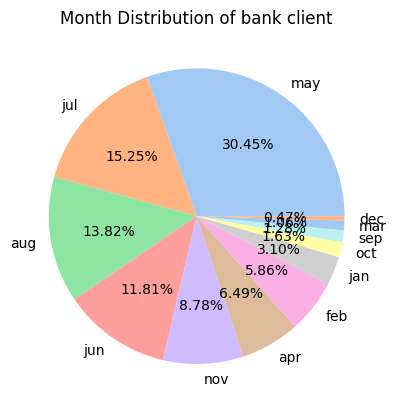
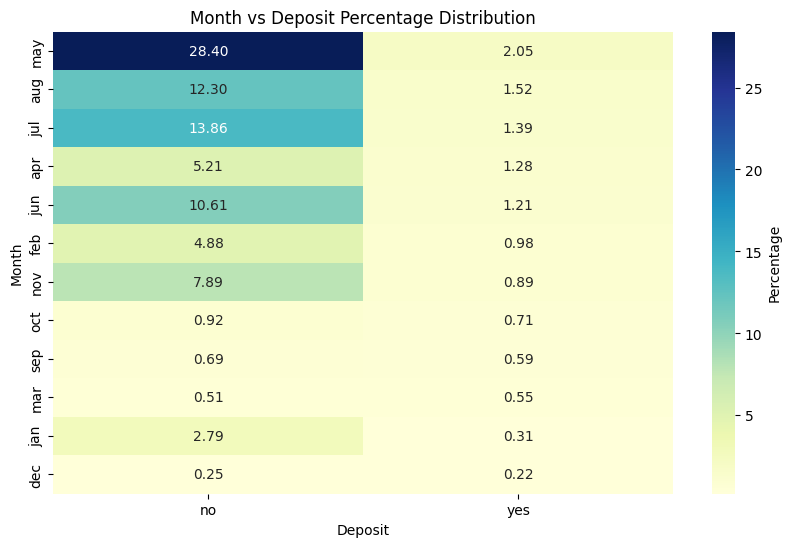
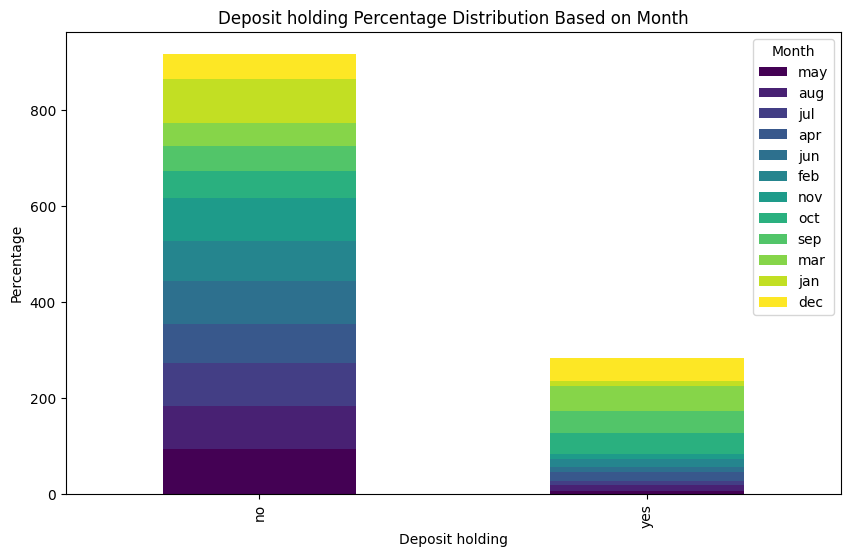
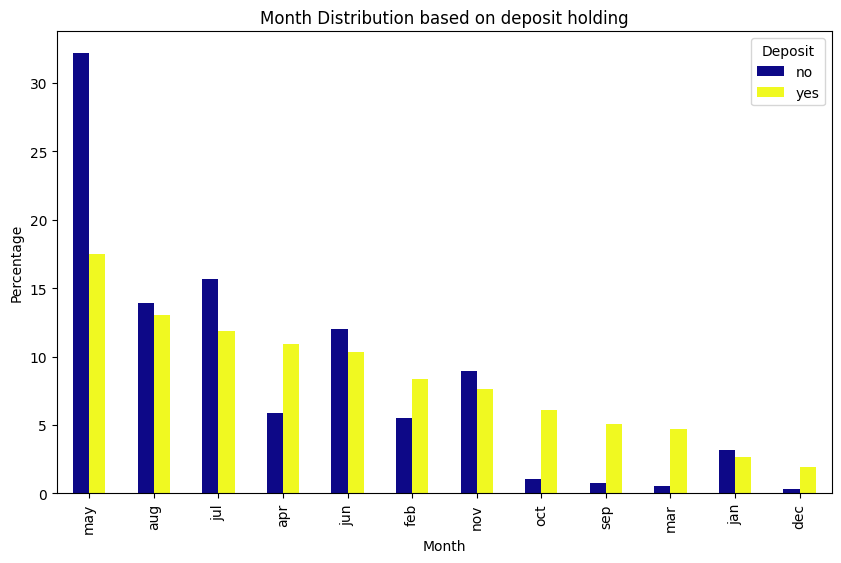

Proporsi Bulan:
- Mei memiliki tingkat keterlibatan tertinggi (30,4% dari nasabah dihubungi), diikuti oleh Juli (15,3%), Agustus (13,8%), dan Juni (11,8%).
- Desember dan Maret memiliki tingkat keterlibatan terendah (0,47% dan 1,05%).

Langganan Deposito Berdasarkan hari:
- Bulan dengan kemungkinan tertinggi untuk langganan deposito berjangka meliputi:
    - Maret: 52% nasabah yang dihubungi berlangganan.
    - September: 46,5% berlangganan.
    - Desember: 46,7% berlangganan.
    - Oktober: 43,8% berlangganan.
- Sebaliknya, bulan dengan tingkat langganan terendah meliputi:
    - Mei: 6,7% berlangganan.
    - November: 10,2% berlangganan.
    - Juni: 10,2% berlangganan.
- Meskipun Mei menyumbang bagian terbesar dari langganan (17,5%), hal ini wajar karena tingginya jumlah kontak nasabah di bulan tersebut.
- Bulan seperti Maret, September, dan Oktober memberikan kontribusi yang signifikan meskipun memiliki volume kontak lebih rendah, menunjukkan efektivitas yang lebih tinggi selama bulan-bulan ini.

Uji Chi-Square:
- Menunjukkan hubungan signifikan antara bulan dan langganan deposito berjangka. Hal ini menunjukkan bahwa bulan-bulan tertentu lebih kondusif untuk mendapatkan langganan.

### 3. Summary

Dari seluruh faktor temporal (day, month) terdapat hubungan yang sangat signifikan dengan langganan deposito. Meliputi:
- Hari:
    - Fokus pada awal bulan untuk keterlibatan nasabah dapat sedikit meningkatkan tingkat langganan.
    - Hal ini mungkin disebabkan oleh faktor seperti anggaran baru atau perencanaan keuangan di awal bulan.
- Bulan:
    - Meskipun Mei memiliki tingkat keterlibatan nasabah tertinggi, bulan ini tidak efektif untuk meningkatkan langganan.
    - Bulan seperti Maret, September, Oktober, dan Desember menunjukkan tingkat konversi yang jauh lebih tinggi dibandingkan dengan volume kontak, yang menunjukkan bahwa kampanye yang ditargetkan selama bulan-bulan ini dapat menghasilkan hasil yang lebih baik.

Rekomendasi:
- Jadwalkan kampanye dan kontak di awal bulan untuk memanfaatkan kemungkinan langganan yang sedikit lebih tinggi.
- Fokuskan sumber daya pemasaran pada bulan-bulan yang efektif (Maret, September, Oktober, Desember) daripada hanya bulan-bulan dengan tingkat keterlibatan tinggi seperti Mei.
- Cari tau lebih lanjut faktor-faktor yang membuat bulan-bulan ini efektif (misalnya, tren musiman, siklus keuangan, atau musim liburan) dan sesuaikan pesan campaign dengan kondisi tersebut.

## Summary

1. Faktor Demografis
    - Target Utama: Fokus pada nasabah usia lebih tua, terutama pensiunan dan lansia karena cenderung lebih berminat untuk berlangganan deposito. Selain itu nasabah dengan tingkat pendidikan lebih tinggi, lebih mungkin untuk berlangganan.
    - Target Kedua: Nasabah single dan mahasiswa cenderung memiliki lebih sedikit tanggungan, sehingga lebih terbuka terhadap produk keuangan seperti deposito berjangka. Sesuaikan campaign untuk menarik minat kelompok tersebut, misal dengan menekankan pada perencanaan keuangan jangka panjang.
    - Target Ketiga: Pekerja kasar (blue-collar), nasabah yang suda menikah, dan nasabah dengan tingkat pendidikan menengah memiliki tingkat langganan deposito yang lebih rendah. Sesuaikan produk untuk memenuhi situasi keuangan mereka, misal dengan menawarkan opsi deposito dengan resiko lebih rendah atau fleksibilitas lebih tinggi.
2. Faktor Ekonomi
    - Nasabah tanpa default, tanpa hutang dan nasabah dengan saldo yang lebih tinggi lebih cendurung untuk belangganan deposito.
    - Fokuskan pemasaran pada nasabah tanpa default, dengan saldo lebih tinggi, dan tanpa hutang. Kelompok tersebut lebih stabil secara finansial dan terbuka untuk berinvestasi dalam bentuk deposito.
3. Faktor Campaign Sebelumnya
    - Hindari menghubungi nasabah terlalu sering. Nasabah yang dihubungi dalam kategori 'Frekuensi Rendah' lebih mungkin berlangganan deposito.
    - Hasil sukses pada campaign sebelumya secara signifikan meningkatkan kemungkinan berlangganan. Analisis campaign sukses sebelumnya dan replikasi strategi untuk mendapatkan peluang yang serupa.
    - Tingkatkan mekanisme tracing data agar dapat memberikan insight yang lebih baik tentang strategi mana yang paling efektif dan area mana yang perlu ditingkatkan.
4. Faktor Engagement
    - Semakin lama interaksi semakin tinggi tingkat konversi. Nasabah yang terlibat dalam percakapan lebih lama cenderung lebih berlangganan deposito.
    - Gunakan kontak melalui ponsel atau telepon karena memiliki tingkat konversi lebih tinggi serta tingkatkan saluran komunikasi untuk memperkuat keterlibatan nasabah.
    - Latih tim sales untuk memaksimalkan durasi percakapan dan fokus untuk menangani kekhawtiran nasabah atau mengudukasi nasabah terkait deposito berjangka.
5. Faktor Temporal
    - Nasabah lebih mungkin untuk berlangganan deposito berjangka diawal bulan, mungkin karena perencanaan keuangan atau anggaran baru.
    - Maret, September, Oktober, dan Desember adalah bulan yang menunjukkan tingkat konversi lebih tinggi, menunjukkan bulan-bulan ini lebih kondusif untuk konversi.
    - Jadwalkan campaign secara strategis di awal bulan dan prioritaskan bulan dengan tingkat konversi lebih tinggi (Maret, September, Oktober, Desember).

Secara keseluruhan untuk efektif meningkatkan tingkat langganan deposito, targetkan nasabah yang stabil secara finansial, berpendidikan, dan lebih tua, sembari juga fokus pada kelompok lajang dan mahasiswa. Gunakan penargetan strategis berdasarkan kinerja kampanye sebelumnya, tingkatkan keterlibatan melalui komunikasi yang lebih lama dan langsung, serta fokuskan campaign di awal bulan dan bulan dengan tingkat konversi tinggi. Selain itu, tingkatkan tracing data agar memahami keberhasilan campaign di masa lalu untuk lebih mengoptimalkan campaign di masa depan.

# Segmentations

Segments:
- High potential: Older clients, higher education, no debt, no default, and high balances.
- Moderate potential:  Single clients or students with moderate balances and no debt.
- Low potential: Blue-collar workers, clients with default history, or existing loans.

In [185]:
segmented_client = bank_full.copy()
segmented_client

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [ ]:
job_category_mapping = {
    "admin.": "white-collar",
    "unknown": "unknown",
    "unemployed": "unemployed",
    "management": "white-collar",
    "housemaid": "blue-collar",
    "entrepreneur": "white-collar",
    "student": "unemployed",
    "blue-collar": "blue-collar",
    "self-employed": "white-collar",
    "retired": "retired",
    "technician": "white-collar",
    "services": "blue-collar"
}

segmented_client['job'] = segmented_client['job'].map(job_category_mapping)

In [187]:
segmented_client

age           job   marital  education default  balance housing loan  \
0       58  white-collar   married   tertiary      no     2143     yes   no   
1       44  white-collar    single  secondary      no       29     yes   no   
2       33  white-collar   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51  white-collar   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  white-collar   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [188]:
conditions = [
    # High potential
    ((segmented_client['job'] == 'white-collar') | (segmented_client['job'] == 'retired')) &
    (segmented_client['education'] == 'tertiary') &
    ((segmented_client['housing'] == 'no') & (segmented_client['loan'] == 'no')) &
    (segmented_client['balance'] > 1427),

    # Moderate potential
    (segmented_client['marital'] == 'single') &
    (segmented_client['job'] == 'unemployed') &
    ((segmented_client['housing'] == 'no') & (segmented_client['loan'] == 'no')) &
    ((segmented_client['balance'] < 1427) & (segmented_client['balance'] > 71))
]

outputs = ['high', 'moderate']

In [189]:
segmented_client['potential'] = np.select(conditions, outputs, default='low')
segmented_client

age           job   marital  education default  balance housing loan  \
0       58  white-collar   married   tertiary      no     2143     yes   no   
1       44  white-collar    single  secondary      no       29     yes   no   
2       33  white-collar   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51  white-collar   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  white-collar   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

         y potential  
0       no       low  
1       no       low  
2       no       low  
3       no       low  
4       no       low  
...    ...       ...  
45206  yes       low  
45207  yes       low  
45208  yes       low  
45209   no       low  
45210   no       low  

[45211 rows x 18 columns]

In [190]:
segmented_client_ct = pd.crosstab(segmented_client['potential'], segmented_client['y'], dropna = False).sort_values(by = 'yes', ascending = False)
segmented_client_ct

y             no   yes
potential             
low        38197  4607
high        1407   499
moderate     318   183

In [191]:
segmented_crosstab_percentage = (segmented_client_ct / segmented_client_ct.values.sum() * 100)
segmented_crosstab_percentage

y                 no        yes
potential                      
low        84.486076  10.189998
high        3.112074   1.103714
moderate    0.703369   0.404769

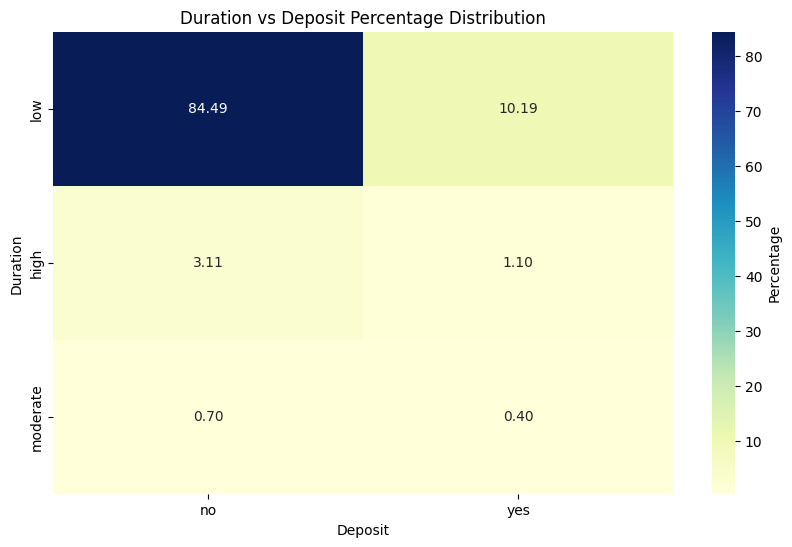

In [192]:
plt.figure(figsize=(10, 6))
sns.heatmap(segmented_crosstab_percentage, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title("Duration vs Deposit Percentage Distribution")
plt.xlabel("Deposit")
plt.ylabel("Duration")
plt.show()

In [193]:
segmented_crosstab_percentage = segmented_client_ct.div(segmented_client_ct.sum(axis=1), axis=0) * 100
segmented_crosstab_percentage

y                 no        yes
potential                      
low        89.236987  10.763013
high       73.819517  26.180483
moderate   63.473054  36.526946

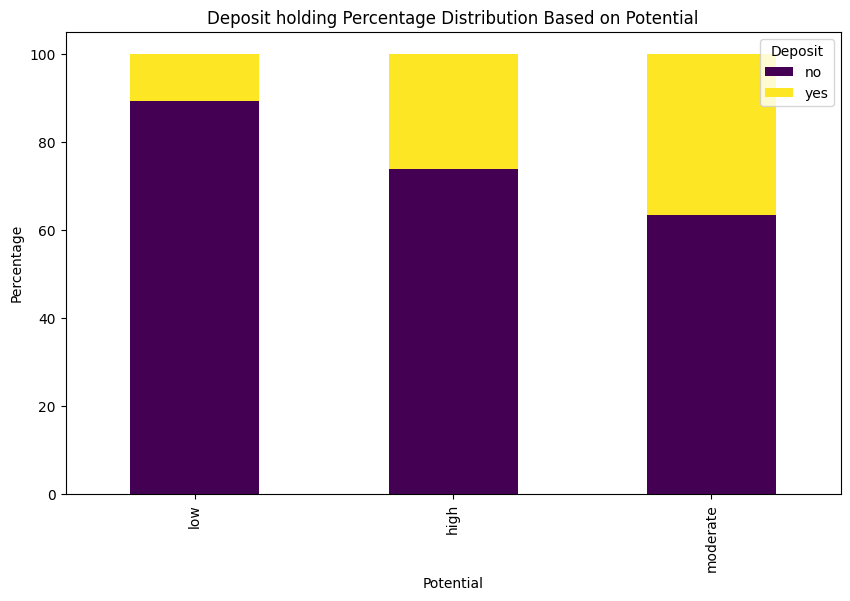

In [194]:
segmented_crosstab_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Deposit holding Percentage Distribution Based on Potential")
plt.xlabel("Potential")
plt.ylabel("Percentage")
plt.legend(title="Deposit")
plt.show()

In [195]:
segmented_crosstab_percentage = segmented_client_ct.div(segmented_client_ct.sum(axis=0), axis=1) * 100
segmented_crosstab_percentage = segmented_crosstab_percentage.T
segmented_crosstab_percentage

potential        low      high  moderate
y                                       
no         95.679074  3.524373  0.796553
yes        87.105313  9.434676  3.460011

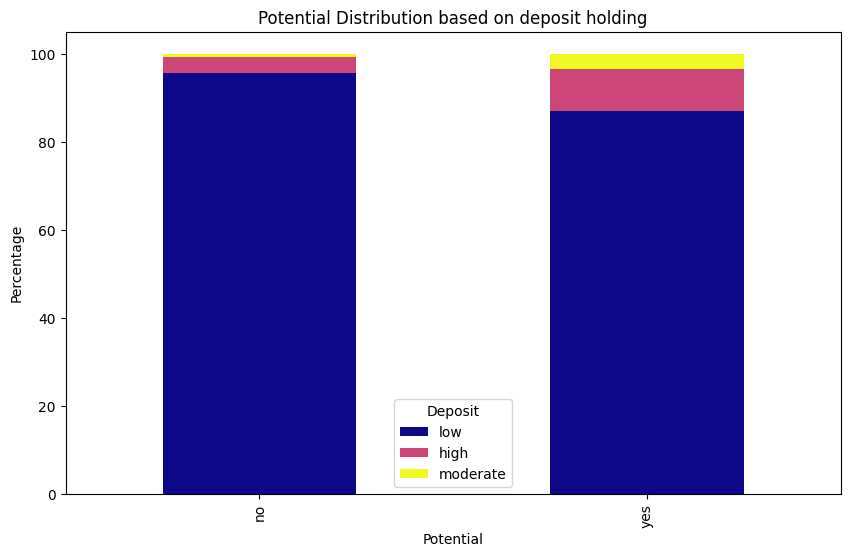

In [196]:
segmented_crosstab_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="plasma")
plt.title("Potential Distribution based on deposit holding")
plt.xlabel("Potential")
plt.ylabel("Percentage")
plt.legend(title="Deposit")
plt.show()

## Non-Subs Client

In [197]:
n_segmented_client = segmented_client[segmented_client['y'] == 'no']
n_segmented_client

age           job  marital  education default  balance housing loan  \
0       58  white-collar  married   tertiary      no     2143     yes   no   
1       44  white-collar   single  secondary      no       29     yes   no   
2       33  white-collar  married  secondary      no        2     yes  yes   
3       47   blue-collar  married    unknown      no     1506     yes   no   
4       33       unknown   single    unknown      no        1      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45194   59  white-collar  married   tertiary      no      138     yes  yes   
45198   37  white-collar  married   tertiary      no     1428      no   no   
45199   34   blue-collar   single  secondary      no     1475     yes   no   
45209   57   blue-collar  married  secondary      no      668      no   no   
45210   37  white-collar  married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome   y  \
0        unknown    5   may       261         1     -1         0  unknown  no   
1        unknown    5   may       151         1     -1         0  unknown  no   
2        unknown    5   may        76         1     -1         0  unknown  no   
3        unknown    5   may        92         1     -1         0  unknown  no   
4        unknown    5   may       198         1     -1         0  unknown  no   
...          ...  ...   ...       ...       ...    ...       ...      ...  ..   
45194   cellular   16   nov       162         2    187         5  failure  no   
45198   cellular   16   nov       333         2     -1         0  unknown  no   
45199   cellular   16   nov      1166         3    530        12    other  no   
45209  telephone   17   nov       508         4     -1         0  unknown  no   
45210   cellular   17   nov       361         2    188        11    other  no   

      potential  
0           low  
1           low  
2           low  
3           low  
4           low  
...         ...  
45194       low  
45198      high  
45199       low  
45209       low  
45210       low  

[39922 rows x 18 columns]

### 1. High Potential

#### Who

In [198]:
high_segmented_client = n_segmented_client[n_segmented_client['potential'] == 'high']
high_segmented_client

age           job   marital education default  balance housing loan  \
323     32  white-collar  divorced  tertiary      no     2558      no   no   
1249    41  white-collar   married  tertiary      no     1773      no   no   
1314    36  white-collar   married  tertiary      no     1852      no   no   
1825    29  white-collar    single  tertiary      no     5406      no   no   
1980    40  white-collar   married  tertiary      no     4190      no   no   
...    ...           ...       ...       ...     ...      ...     ...  ...   
45036   28  white-collar   married  tertiary      no     1918      no   no   
45053   25  white-collar    single  tertiary      no     1734      no   no   
45063   75       retired   married  tertiary      no     4912      no   no   
45172   30  white-collar    single  tertiary      no     2325      no   no   
45198   37  white-collar   married  tertiary      no     1428      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome   y  \
323      unknown    5   may       148         2     -1         0  unknown  no   
1249     unknown    8   may       106         1     -1         0  unknown  no   
1314     unknown    8   may       362         1     -1         0  unknown  no   
1825     unknown    9   may       530         2     -1         0  unknown  no   
1980     unknown    9   may       260         4     -1         0  unknown  no   
...          ...  ...   ...       ...       ...    ...       ...      ...  ..   
45036   cellular   18   oct       333         1    616         1  failure  no   
45053   cellular   19   oct       366         1     -1         0  unknown  no   
45063  telephone   20   oct       238         2    183         5  failure  no   
45172   cellular   10   nov       134         1     92         8  success  no   
45198   cellular   16   nov       333         2     -1         0  unknown  no   

      potential  
323        high  
1249       high  
1314       high  
1825       high  
1980       high  
...         ...  
45036      high  
45053      high  
45063      high  
45172      high  
45198      high  

[1407 rows x 18 columns]

#### How

Campaign berfokus pada:
- Keamanan
- Kepercayaan
- Manfaat jangka panjang

Tema pesan:
- 'Siapkan masa depan dengan jaminan pengembalian'
- 'Biarkan tabungan anda yang bekerja untuk ada'

Channel komunikasi:
- Panggilan telpon atau pertemuan tatap muka (karena nasabah ini menghargai kepercayaan dan keterlibatan langsung)

### 2. Moderate Potential

#### Who

In [199]:
moderate_segmented_client = n_segmented_client[n_segmented_client['potential'] == 'moderate']
moderate_segmented_client

age         job marital  education default  balance housing loan  \
1544    33  unemployed  single  secondary      no      177      no   no   
1933    24  unemployed  single  secondary      no      304      no   no   
5944    30  unemployed  single   tertiary      no      306      no   no   
7036    22  unemployed  single  secondary      no      489      no   no   
8145    30  unemployed  single    unknown      no      809      no   no   
...    ...         ...     ...        ...     ...      ...     ...  ...   
45080   27  unemployed  single  secondary      no     1164      no   no   
45112   24  unemployed  single  secondary      no     1234      no   no   
45128   23  unemployed  single   tertiary      no      993      no   no   
45143   28  unemployed  single  secondary      no      970      no   no   
45170   19  unemployed  single    primary      no      245      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome   y  \
1544     unknown    8   may        75         4     -1         0  unknown  no   
1933     unknown    9   may       180         3     -1         0  unknown  no   
5944     unknown   26   may       372        14     -1         0  unknown  no   
7036     unknown   28   may       223         5     -1         0  unknown  no   
8145     unknown    2   jun        91         2     -1         0  unknown  no   
...          ...  ...   ...       ...       ...    ...       ...      ...  ..   
45080   cellular   21   oct       256         2    104         2  failure  no   
45112  telephone   26   oct       280         2     97         3  success  no   
45128   cellular   27   oct       409         1     91         4  success  no   
45143   cellular    8   nov       137         1     96         1  failure  no   
45170  telephone   10   nov        98         2    110         2    other  no   

      potential  
1544   moderate  
1933   moderate  
5944   moderate  
7036   moderate  
8145   moderate  
...         ...  
45080  moderate  
45112  moderate  
45128  moderate  
45143  moderate  
45170  moderate  

[318 rows x 18 columns]

#### How

Campaign berfokus pada:
- Fleksibilitas
- Growth potential
- Perencanaan keuangan

Tema pesan:
- 'Start small, dream big - Kami akan bantu Anda untuk menabung demi tujuan Anda '
- 'Maksimalkan potensi keuangan anda dengan deposito berjangka yang mudah '

Channel komunikasi:
- Channel digital akan menarik bagi nasabah muda atau tech-savy, seperti:
    - Email
    - Sosial media
    - Mobile-apps

### 3. Low Potential

#### Who

In [200]:
low_segmented_client = n_segmented_client[n_segmented_client['potential'] == 'low']
low_segmented_client

age           job  marital  education default  balance housing loan  \
0       58  white-collar  married   tertiary      no     2143     yes   no   
1       44  white-collar   single  secondary      no       29     yes   no   
2       33  white-collar  married  secondary      no        2     yes  yes   
3       47   blue-collar  married    unknown      no     1506     yes   no   
4       33       unknown   single    unknown      no        1      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45189   25   blue-collar   single  secondary      no      199      no   no   
45194   59  white-collar  married   tertiary      no      138     yes  yes   
45199   34   blue-collar   single  secondary      no     1475     yes   no   
45209   57   blue-collar  married  secondary      no      668      no   no   
45210   37  white-collar  married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome   y  \
0        unknown    5   may       261         1     -1         0  unknown  no   
1        unknown    5   may       151         1     -1         0  unknown  no   
2        unknown    5   may        76         1     -1         0  unknown  no   
3        unknown    5   may        92         1     -1         0  unknown  no   
4        unknown    5   may       198         1     -1         0  unknown  no   
...          ...  ...   ...       ...       ...    ...       ...      ...  ..   
45189   cellular   16   nov       173         1     92         5  failure  no   
45194   cellular   16   nov       162         2    187         5  failure  no   
45199   cellular   16   nov      1166         3    530        12    other  no   
45209  telephone   17   nov       508         4     -1         0  unknown  no   
45210   cellular   17   nov       361         2    188        11    other  no   

      potential  
0           low  
1           low  
2           low  
3           low  
4           low  
...         ...  
45189       low  
45194       low  
45199       low  
45209       low  
45210       low  

[38197 rows x 18 columns]

#### How

Campaign berfokus pada:
- Resiko rendah
- Setoran awal lebih kecil
- Penarikan fleksibel

Tema pesan:
- 'Selangkah menuju pertumbuhan keuangan dengan satu deposito'
- 'Investasi yang aman dan mudah untuk semua orang'

Channel komunikasi:
- Berbasis broadcast, seperti:
    - SMS
    - Bulk email
    - Iklan

### When

Manfaatkan faktor waktu:
- Awal bulan (1-10) : Ketika nasabah punya pemasukan
- High-Conversion Month: Maret, September, October, dan Desember

Implementasi:
- Jadwalkan customize outreach untuk high-potential nasabah pada awal bulan high-conversion
- Gunakan reminder atau targetted ads untuk moderate-potential nasabah selama periode campaign 
- Buat campaign yang lebih luah (iklan atau sms) untuk low-potential nasabah pada pertengahan bulan.


## Engagement Optimization

Maksimalkan rate conversion dengan memperbaiki strategi interaksi dengan nasabah:
- Latih tim sales:
    - Edukasi bagaimana handle concern nasabah terkait deposito dengan efektif.
    - Sediakan script yang berfokus pada keamanan finansial, potensi pertumbuhan, dan membangun kepercayaan.
- Tingkatkan waktu interaksi:
    - Buat percakapan lebih panjang agar menjelaskan keraguan dan manfaat lebih jelas.
    - Gunakan contoh atau cerita sukses dari nasabah lain untuk membangun kepercayaan.
- Maksimalkan channel komunikasi:
    - Prioritaskan komunikasi ponsel atau telepon, karena memiliki conversion rate yang lebih tinggi.
    - Untuk nasabah atau tech-savy, pastikan website, apps, dan sosial media campaign telah dioptimalkan untuk interaksi.

In [201]:
sub_percentage = bank_full['y'].value_counts(normalize = True) * 100
sub_percentage

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

In [202]:
sub_client = bank_full[bank_full['y'] == 'yes']
sub_client

age         job   marital  education default  balance housing loan  \
83      59      admin.   married  secondary      no     2343     yes   no   
86      56      admin.   married  secondary      no       45      no   no   
87      41  technician   married  secondary      no     1270     yes   no   
129     55    services   married  secondary      no     2476     yes   no   
168     54      admin.   married   tertiary      no      184      no   no   
...    ...         ...       ...        ...     ...      ...     ...  ...   
45204   73     retired   married  secondary      no     2850      no   no   
45205   25  technician    single  secondary      no      505      no  yes   
45206   51  technician   married   tertiary      no      825      no   no   
45207   71     retired  divorced    primary      no     1729      no   no   
45208   72     retired   married  secondary      no     5715      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome    y  
83      unknown    5   may      1042         1     -1         0  unknown  yes  
86      unknown    5   may      1467         1     -1         0  unknown  yes  
87      unknown    5   may      1389         1     -1         0  unknown  yes  
129     unknown    5   may       579         1     -1         0  unknown  yes  
168     unknown    5   may       673         2     -1         0  unknown  yes  
...         ...  ...   ...       ...       ...    ...       ...      ...  ...  
45204  cellular   17   nov       300         1     40         8  failure  yes  
45205  cellular   17   nov       386         2     -1         0  unknown  yes  
45206  cellular   17   nov       977         3     -1         0  unknown  yes  
45207  cellular   17   nov       456         2     -1         0  unknown  yes  
45208  cellular   17   nov      1127         5    184         3  success  yes  

[5289 rows x 17 columns]

In [203]:
potential_sub = n_segmented_client[n_segmented_client['potential'] != 'low']
potential_sub

age           job   marital  education default  balance housing loan  \
323     32  white-collar  divorced   tertiary      no     2558      no   no   
1249    41  white-collar   married   tertiary      no     1773      no   no   
1314    36  white-collar   married   tertiary      no     1852      no   no   
1544    33    unemployed    single  secondary      no      177      no   no   
1825    29  white-collar    single   tertiary      no     5406      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45128   23    unemployed    single   tertiary      no      993      no   no   
45143   28    unemployed    single  secondary      no      970      no   no   
45170   19    unemployed    single    primary      no      245      no   no   
45172   30  white-collar    single   tertiary      no     2325      no   no   
45198   37  white-collar   married   tertiary      no     1428      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome   y  \
323      unknown    5   may       148         2     -1         0  unknown  no   
1249     unknown    8   may       106         1     -1         0  unknown  no   
1314     unknown    8   may       362         1     -1         0  unknown  no   
1544     unknown    8   may        75         4     -1         0  unknown  no   
1825     unknown    9   may       530         2     -1         0  unknown  no   
...          ...  ...   ...       ...       ...    ...       ...      ...  ..   
45128   cellular   27   oct       409         1     91         4  success  no   
45143   cellular    8   nov       137         1     96         1  failure  no   
45170  telephone   10   nov        98         2    110         2    other  no   
45172   cellular   10   nov       134         1     92         8  success  no   
45198   cellular   16   nov       333         2     -1         0  unknown  no   

      potential  
323        high  
1249       high  
1314       high  
1544   moderate  
1825       high  
...         ...  
45128  moderate  
45143  moderate  
45170  moderate  
45172      high  
45198      high  

[1725 rows x 18 columns]

In [204]:
low_potential_sub = n_segmented_client[n_segmented_client['potential'] == 'low']
low_potential_sub 

age           job  marital  education default  balance housing loan  \
0       58  white-collar  married   tertiary      no     2143     yes   no   
1       44  white-collar   single  secondary      no       29     yes   no   
2       33  white-collar  married  secondary      no        2     yes  yes   
3       47   blue-collar  married    unknown      no     1506     yes   no   
4       33       unknown   single    unknown      no        1      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45189   25   blue-collar   single  secondary      no      199      no   no   
45194   59  white-collar  married   tertiary      no      138     yes  yes   
45199   34   blue-collar   single  secondary      no     1475     yes   no   
45209   57   blue-collar  married  secondary      no      668      no   no   
45210   37  white-collar  married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome   y  \
0        unknown    5   may       261         1     -1         0  unknown  no   
1        unknown    5   may       151         1     -1         0  unknown  no   
2        unknown    5   may        76         1     -1         0  unknown  no   
3        unknown    5   may        92         1     -1         0  unknown  no   
4        unknown    5   may       198         1     -1         0  unknown  no   
...          ...  ...   ...       ...       ...    ...       ...      ...  ..   
45189   cellular   16   nov       173         1     92         5  failure  no   
45194   cellular   16   nov       162         2    187         5  failure  no   
45199   cellular   16   nov      1166         3    530        12    other  no   
45209  telephone   17   nov       508         4     -1         0  unknown  no   
45210   cellular   17   nov       361         2    188        11    other  no   

      potential  
0           low  
1           low  
2           low  
3           low  
4           low  
...         ...  
45189       low  
45194       low  
45199       low  
45209       low  
45210       low  

[38197 rows x 18 columns]

In [205]:
potential_client = (len(sub_client) + (len(potential_sub) // 2 )+ (len(low_potential_sub) // 25)) / len(bank_full) * 100
potential_client

16.98259273185729

Bisa meningkatkan subcripstion rate menjadi 15% jika mampu mengakuisisi 50% dari nasabah dengan potensi tinggi dan sedang serta 4% dari nasabah dengan potensi rendah